<a href="https://colab.research.google.com/github/Dwagh14/Unsupervised-ML-Zomato-Restaurant-Clustering/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Almabetter/Unsupervised ML Capstone - Zomato Restaurant Reviews/Zomato Restaurant reviews.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Almabetter/Unsupervised ML Capstone - Zomato Restaurant Reviews/Zomato Restaurant names and Metadata.csv')

In [ ]:
df1.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
df1.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [ ]:
df2.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
df2.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
df1.shape, df2.shape

((10000, 7), (105, 6))

# Data Cleaning

In [ ]:
meta_df = df2.copy()

In [ ]:
meta_df.duplicated().sum()

0

In [ ]:
reviews_df = df1.copy()

In [ ]:
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
reviews_df.dropna(inplace = True)

In [ ]:
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [ ]:
reviews_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [ ]:
reviews_df.Rating.value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

# **Like is only 1, So we can drop it to convert Rating to Float dtype**

In [ ]:
reviews_df = reviews_df[reviews_df['Rating'] != 'Like']

In [ ]:
reviews_df.Rating.value_counts()

5      3826
4      2373
1      1735
3      1192
2       684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [ ]:
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')
reviews_df['Reviews'], reviews_df['Followers'] = reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(',').str[1])
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis=1)

In [ ]:
reviews_df.head(5)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,NaN,2019,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,NaN,2019,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,NaN,2019,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,NaN,2019,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,NaN,2019,21


# Exploratory Data Analysis

In [ ]:
reviews_df.Year.unique()

array([2019, 2018, 2017, 2016])

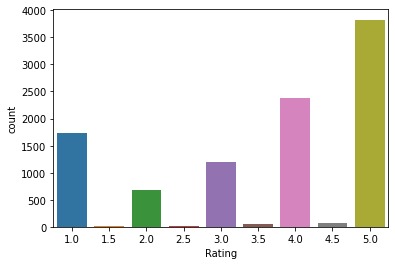

In [ ]:
sns.countplot(reviews_df.Rating)

In [ ]:
reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending = False).reset_index()

,Restaurant,Rating
0,AB's - Absolute Barbecues,4.880
1,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
3,Paradise,4.700
4,Flechazo,4.660
...,...,...
95,Behrouz Biryani,2.825
96,Mathura Vilas,2.820
97,Pakwaan Grand,2.710
98,Asian Meal Box,2.580


Text(0.5, 1.0, 'Top Rated 10 Restaurants')

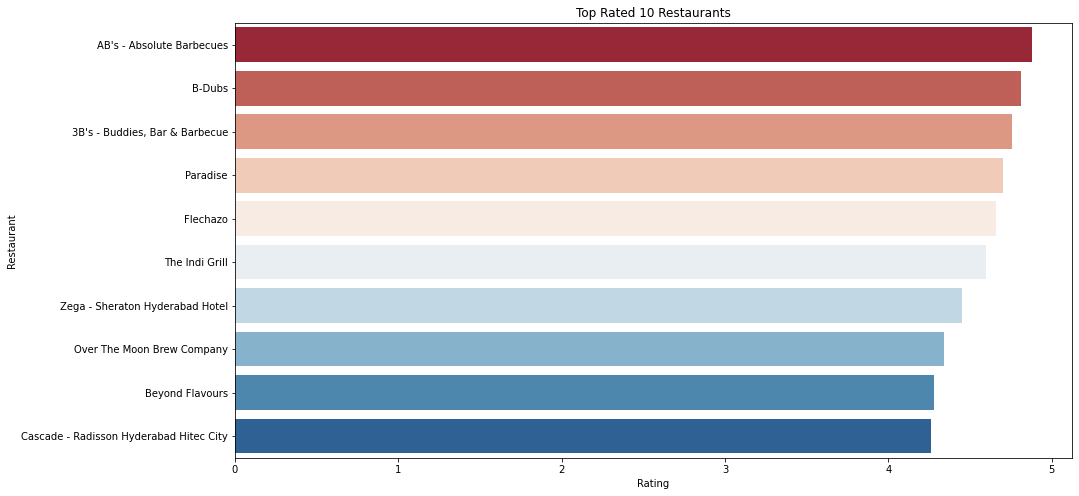

In [ ]:
df_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending = False).reset_index()
df_rating = df_rating.sort_values(by='Rating', ascending = False).head(10)

plt.figure(figsize = (15,8))
sns.barplot(data = df_rating, x = "Rating", y = "Restaurant", palette = 'RdBu')
plt.title('Top Rated 10 Restaurants')

In [ ]:
yw_avg_rating = reviews_df.groupby(['Restaurant', 'Year'])['Rating'].mean().sort_values(ascending=False).reset_index()
twenty_ninteen = yw_avg_rating[yw_avg_rating.Year == 2019].head(10)
twenty_ninteen

,Restaurant,Year,Rating
0,AB's - Absolute Barbecues,2019,4.880000
1,B-Dubs,2019,4.810000
2,"3B's - Buddies, Bar & Barbecue",2019,4.760000
3,Paradise,2019,4.700000
4,Flechazo,2019,4.660000
5,Cascade - Radisson Hyderabad Hitec City,2019,4.641509
7,The Indi Grill,2019,4.600000
8,Karachi Bakery,2019,4.538462
10,Zega - Sheraton Hyderabad Hotel,2019,4.409091
12,Over The Moon Brew Company,2019,4.340000


## Above Listed Restaurant are Top 10 Retaurants in 2019

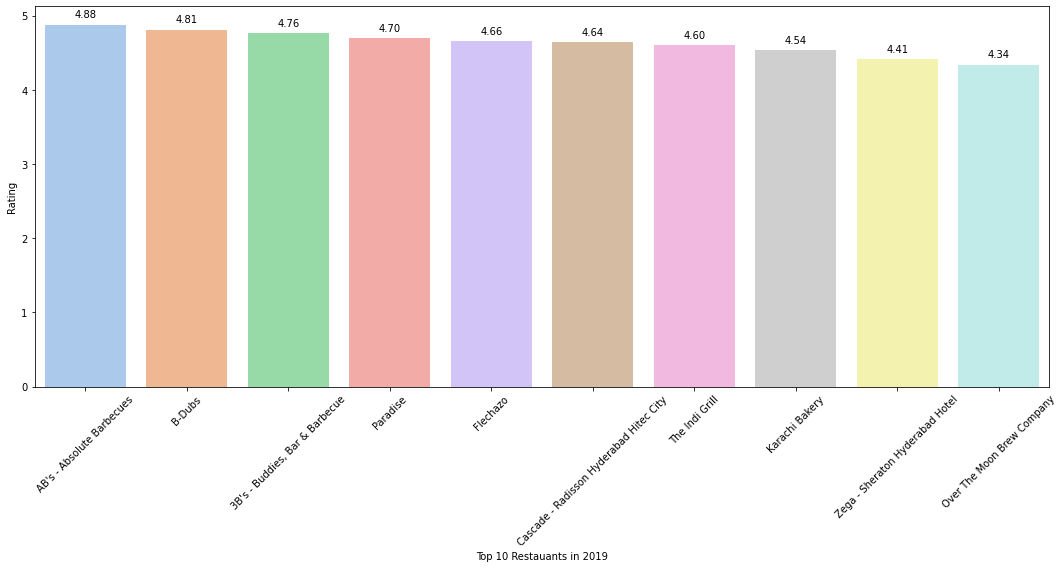

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(twenty_ninteen.Restaurant, twenty_ninteen.Rating, palette = 'pastel')

for p in plot.patches:
  plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() /2. ,p.get_height()), ha = 'center', va = 'center', 
                                                           xytext = (0,10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Rastaurant Name')
plt.xticks(rotation = 45)
plt.xlabel('Top 10 Restauants in 2019')
plt.tight_layout()

## Top 10 Restaurants in Year 2018

In [ ]:
twenty_eighteen = yw_avg_rating[yw_avg_rating.Year == 2018].head(10)
twenty_eighteen

,Restaurant,Year,Rating
6,Feast - Sheraton Hyderabad Hotel,2018,4.629630
9,Zega - Sheraton Hyderabad Hotel,2018,4.461538
11,Mazzo - Marriott Executive Apartments,2018,4.375000
14,Hyderabadi Daawat,2018,4.296296
21,Cascade - Radisson Hyderabad Hitec City,2018,4.211538
23,NorFest - The Dhaba,2018,4.166667
25,Barbeque Nation,2018,4.072464
27,Udipi's Upahar,2018,4.055556
31,American Wild Wings,2018,4.000000
32,Amul,2018,3.988095


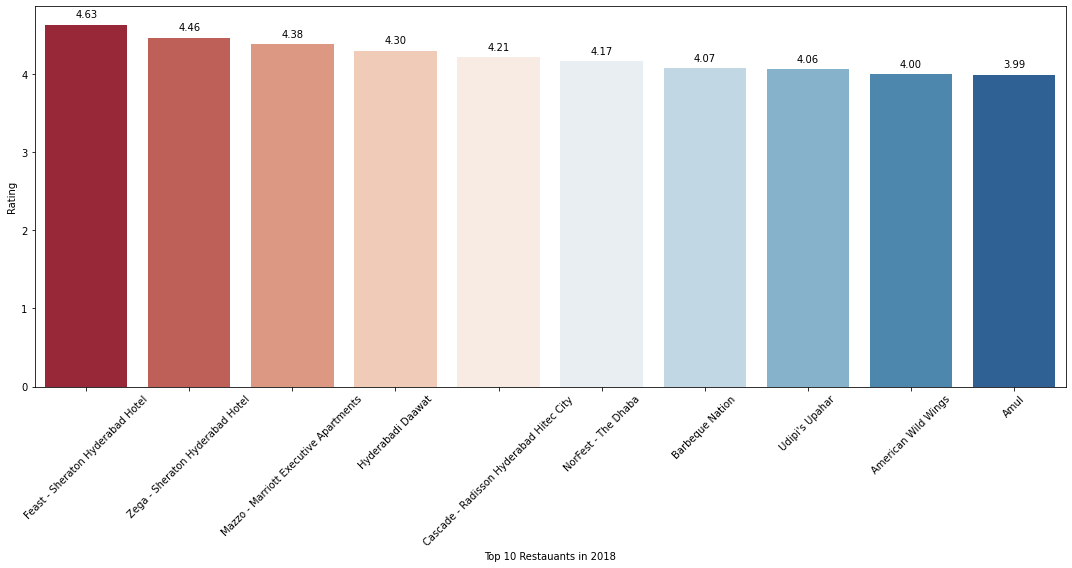

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(twenty_eighteen.Restaurant, twenty_eighteen.Rating, palette = 'RdBu')

for p in plot.patches:
  plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() /2. ,p.get_height()), ha = 'center', va = 'center', 
                                                           xytext = (0,10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Rastaurant Name')
plt.xticks(rotation = 45)
plt.xlabel('Top 10 Restauants in 2018')
plt.tight_layout()

## Top 10 Restaurants in Year 2017

In [ ]:
twenty_seventeen = yw_avg_rating[yw_avg_rating.Year == 2017].head(10)
twenty_seventeen

,Restaurant,Year,Rating
16,KS Bakers,2017,4.254717
41,Labonel,2017,3.897436
44,Chinese Pavilion,2017,3.883333
51,Collage - Hyatt Hyderabad Gachibowli,2017,3.833333
117,Dunkin' Donuts,2017,3.423077
118,Al Saba Restaurant,2017,3.388889
120,T Grill,2017,3.382353
122,Cascade - Radisson Hyderabad Hitec City,2017,3.357143


## There are total 8 Restaurants which get Rating in Year 2017

In [ ]:
twenty_sixteen = yw_avg_rating[yw_avg_rating.Year == 2016].head(10)
twenty_sixteen

,Restaurant,Year,Rating
34,Labonel,2016,3.970588
37,Chinese Pavilion,2016,3.961538


## Labonel and Chinese Pavilion only got the Rating in Year 2016

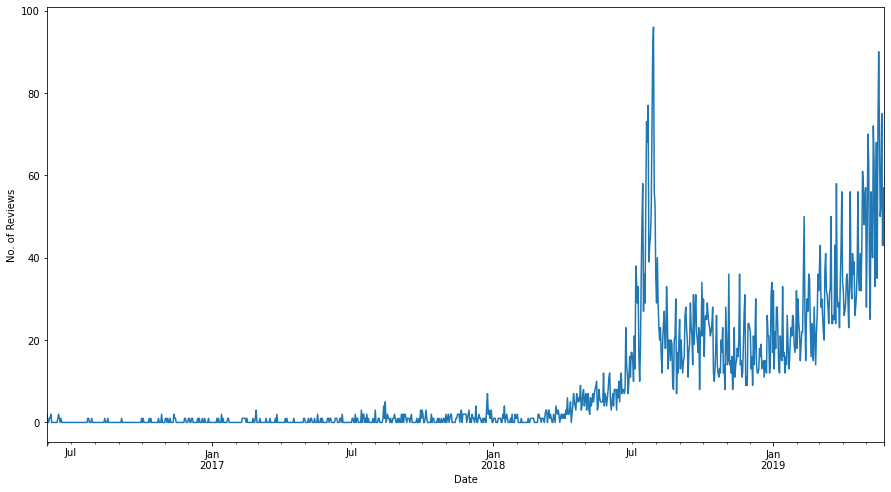

In [ ]:
plt.figure(figsize = (15,8))
reviews_df.resample('1D', on = 'Time')['Reviews'].size().plot.line()
plt.xlabel('Date')
plt.ylabel('No. of Reviews')
plt.show()

In [ ]:
cuisine_list = meta_df.Cuisines.str.split(', ') 
cuis_list = {} 
for names in cuisine_list: 
    for name in names:
        if (name in cuis_list):
            cuis_list[name]+=1
        else:  
            cuis_list[name]=1 
cuis_df = pd.DataFrame(cuis_list.values(),index = cuis_list.keys(),columns = {'Counts of Restaurants'}) 
cuis_df.sort_values(by = 'Counts of Restaurants',ascending = False,inplace = True) 
top_10_cuis = cuis_df[0:10]
print('The Top 10 Cuisines are:\n',top_10_cuis)

The Top 10 Cuisines are:
               Counts of Restaurants
North Indian                     61
Chinese                          43
Continental                      21
Biryani                          16
Fast Food                        15
Asian                            15
Italian                          14
Desserts                         13
South Indian                      9
Bakery                            7


## Top  10 Cuisines

In [ ]:
cuis_df.reset_index(inplace = True)
cuis_df.head(2)

,index,Counts of Restaurants
0,North Indian,61
1,Chinese,43


Text(0.5, 1.0, 'Most Populer Cuisines at Restaurants in hyderabad')

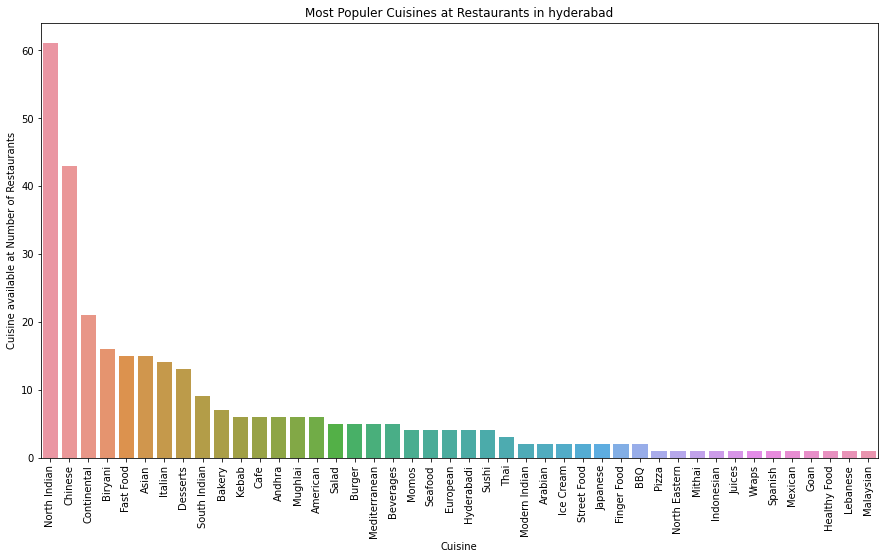

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(data = cuis_df, x = 'index', y = 'Counts of Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Cuisine available at Number of Restaurants')
plt.xticks(Rotation = 90)
plt.title('Most Populer Cuisines at Restaurants in hyderabad')

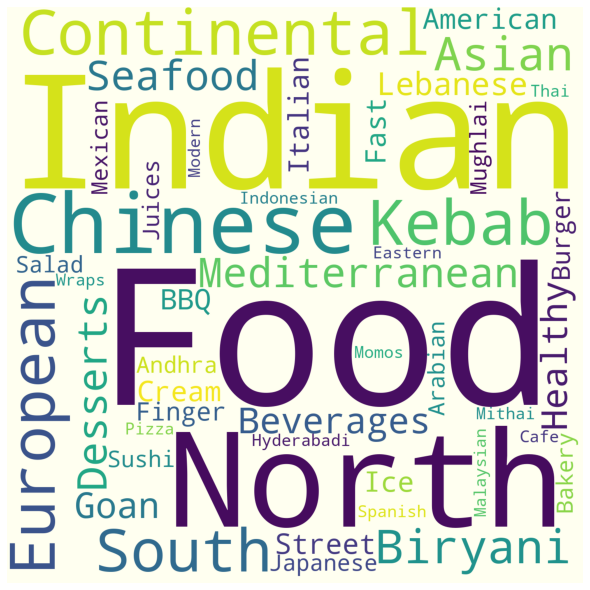

In [ ]:
from wordcloud import WordCloud, STOPWORDS
words_list = cuis_list.keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '
    
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='ivory',  
                min_font_size = 12).generate(strr) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
meta_df['Cost'] = meta_df['Cost'].str.replace("," , "").astype('int64')

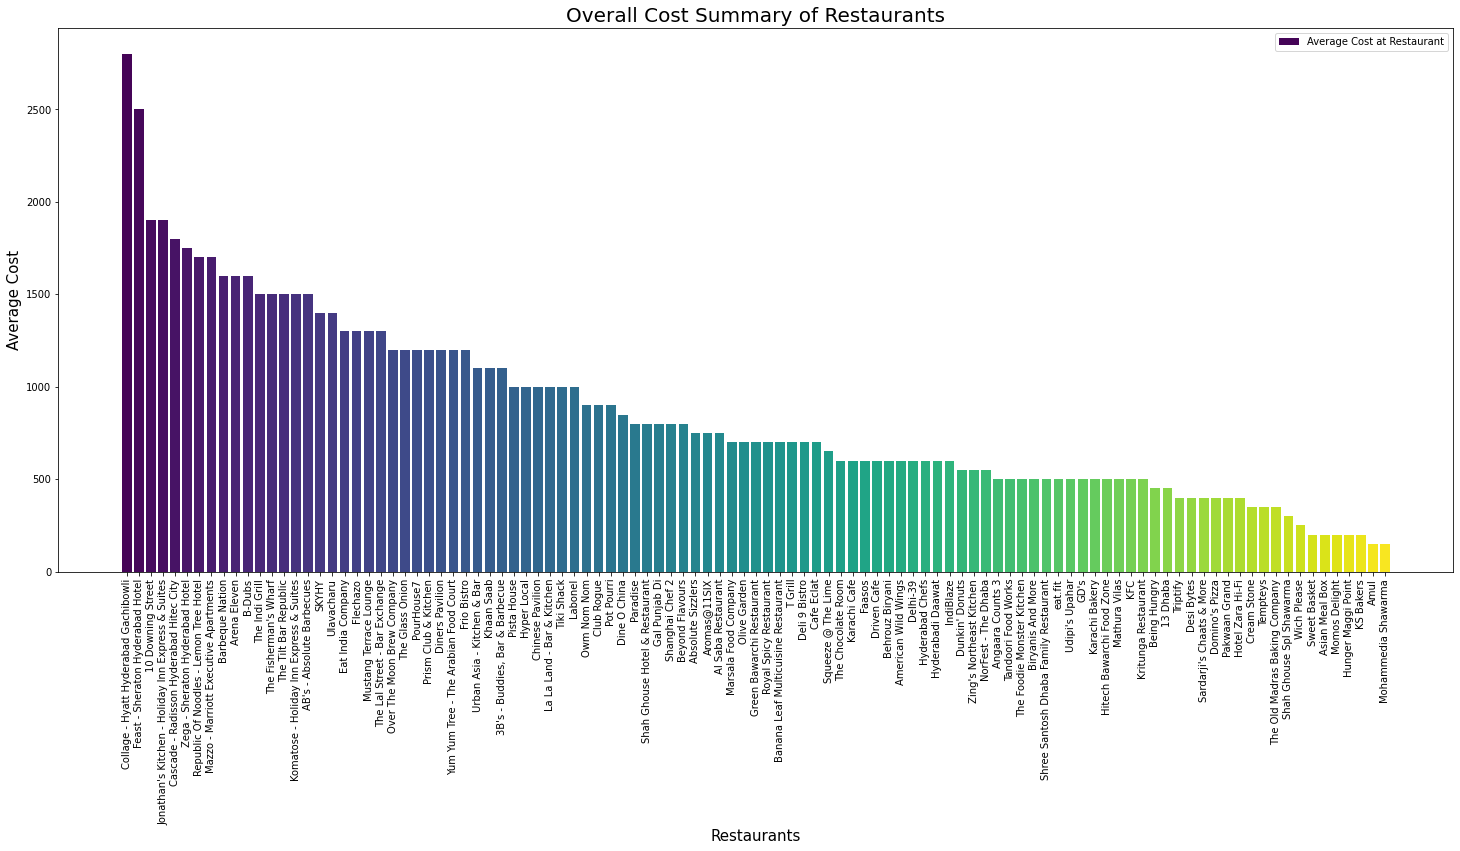

In [ ]:
restaurants_cost=meta_df.groupby('Name')['Cost'].mean().reset_index(name='Cost')
restaurants_cost.sort_values(by='Cost',ascending=False,inplace=True)
plt.figure(figsize=(25,10))
plt.bar(restaurants_cost['Name'],restaurants_cost['Cost'], color = sns.color_palette("viridis", len(restaurants_cost['Name'])))
plt.xlabel('Restaurants',size=15)
plt.xticks(rotation=90)
plt.ylabel('Average Cost',size=15)
plt.title('Overall Cost Summary of Restaurants',size=20)
plt.legend(['Average Cost at Restaurant'])

## 10 Most Expensive Restaurants

In [ ]:
restaurants_cost.sort_values(by='Cost', ascending=False, inplace=True)
restaurants_cost.head(10)

,Name,Cost
23,Collage - Hyatt Hyderabad Gachibowli,2800.0
35,Feast - Sheraton Hyderabad Hotel,2500.0
0,10 Downing Street,1900.0
48,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
20,Cascade - Radisson Hyderabad Hitec City,1800.0
102,Zega - Sheraton Hyderabad Hotel,1750.0
74,Republic Of Noodles - Lemon Tree Hotel,1700.0
60,Mazzo - Marriott Executive Apartments,1700.0
14,Barbeque Nation,1600.0
9,Arena Eleven,1600.0


Text(0.5, 1.0, '10 Most Expensive Restaurants')

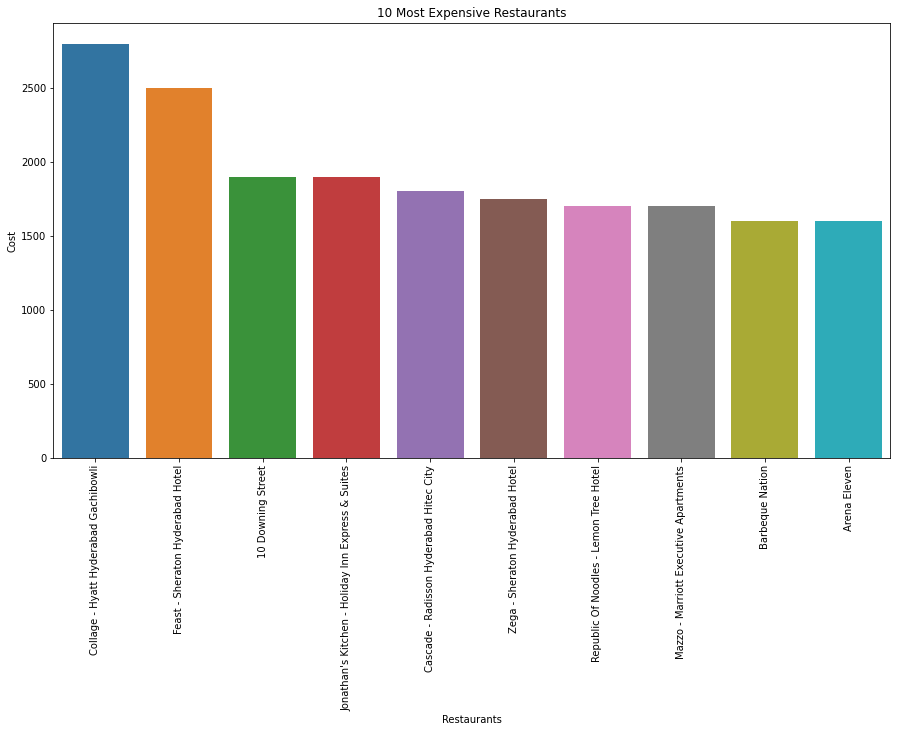

In [ ]:
fig = plt.figure(figsize=[15,8])
sns.barplot(data=restaurants_cost.head(10), x='Name', y= 'Cost')
plt.xlabel('Restaurants')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.title('10 Most Expensive Restaurants')

## 10 Cheapest Restaurants

In [ ]:
restaurants_cost.tail(10)

,Name,Cost
93,The Old Madras Baking Company,350.0
79,Shah Ghouse Spl Shawarma,300.0
100,Wich Please,250.0
83,Sweet Basket,200.0
11,Asian Meal Box,200.0
62,Momos Delight,200.0
43,Hunger Maggi Point,200.0
50,KS Bakers,200.0
7,Amul,150.0
61,Mohammedia Shawarma,150.0


Text(0.5, 1.0, '10 Cheapest Restaurants')

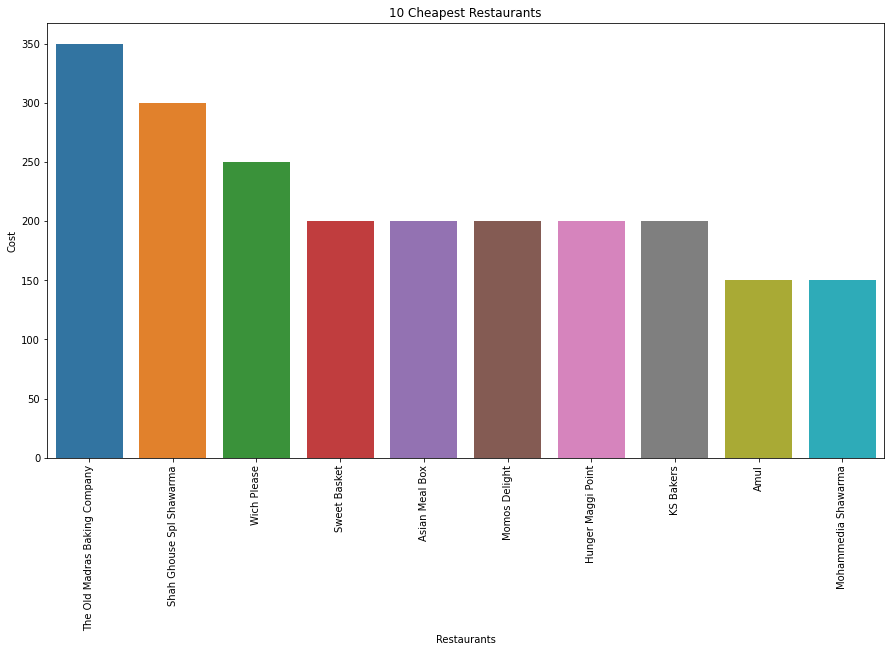

In [ ]:
fig = plt.figure(figsize=[15,8])
sns.barplot(data=restaurants_cost.tail(10), x='Name', y= 'Cost')
plt.xlabel('Restaurants')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.title('10 Cheapest Restaurants')

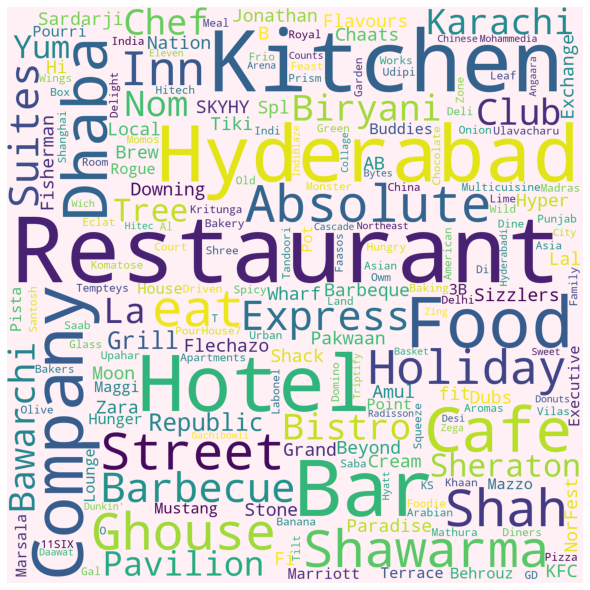

In [ ]:
Rests = meta_df.Name.unique()
rest_string = ' '
for i in Rests:
   rest_string = rest_string+i+' '
    
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='lavenderblush',  
                min_font_size = 12).generate(rest_string) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Performing Clustering

### Time duration of each restaurant per week

In [ ]:
time_opened_weekly = [52.5,84,66.5,98,79,73.5,105,84,84,106.5,49,59.5,94.5,
                      84,66.5,84,73.5,94.5,84,77,57,52.5,88.5,133,86,78.5,72.5,
                      63,105,97,np.nan,91,63,91,126,77,46.2,56,79,73.5,77,84,
                      84,126,80.5,80.5,80.5,77,115.5,61.25,56,77,84,59.5,86,108.5,
                      71,52.5,94.5,91,86,49,87.5,80.5,73.5,70,87.5,84,84,77,49,49,
                      54,140,112,87.5,112,73.5,56,52.5,86,84,122.5,122.5,49,56,
                      98,112,84,84,84,168,168,59.5,91,78,77,98,84,52.5,84,91.5,77,115.5,59.5]

In [ ]:
df2["time_opened_weekly(hours)"] = time_opened_weekly

In [ ]:
df2['Cuisines'] = df2['Cuisines'].apply(lambda x : x.lower())

In [ ]:
d = df2.copy()

In [ ]:
d = d.loc[:, ['Name', 'Cost', 'Cuisines', 'time_opened_weekly(hours)']]

In [ ]:
def cuisine_list(cuisines):

  
  all_cuisines = list(set(cuisines.split(', ')))
  return all_cuisines

In [ ]:
d['cuisine']=d['Cuisines'].apply(lambda x:cuisine_list(x))

In [ ]:
d.head()

,Name,Cost,Cuisines,time_opened_weekly(hours),cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",52.5,"[north indian, kebab, continental, chinese, so..."
1,Paradise,800,"biryani, north indian, chinese",84.0,"[north indian, chinese, biryani]"
2,Flechazo,"1,300","asian, mediterranean, north indian, desserts",66.5,"[north indian, mediterranean, desserts, asian]"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...",98.0,"[north indian, seafood, beverages, biryani, ch..."
4,Over The Moon Brew Company,"1,200","asian, continental, north indian, chinese, med...",79.0,"[north indian, continental, mediterranean, chi..."


In [ ]:
d = d.explode('cuisine')
d.head()

,Name,Cost,Cuisines,time_opened_weekly(hours),cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",52.5,north indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",52.5,kebab
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",52.5,continental
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",52.5,chinese
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",52.5,south indian


In [ ]:
set(d['cuisine'])

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'goan',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'pizza',
 'salad',
 'seafood',
 'south indian',
 'spanish',
 'street food',
 'sushi',
 'thai',
 'wraps'}

In [ ]:
d['cuisine']

0      north indian
0             kebab
0       continental
0           chinese
0      south indian
           ...     
103       fast food
104            thai
104         chinese
104       malaysian
104           asian
Name: cuisine, Length: 313, dtype: object

# Binning all the Cuisine into their respective superests spicy food, Healthy Food, Fast Food and Dessert

In [ ]:
l=[]
for i in d['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

In [ ]:
superset_cuisine=pd.DataFrame(l)
superset_cuisine.columns=['cuisine']
superset_cuisine

,cuisine
0,spicy food
1,spicy food
2,spicy food
3,fast food
4,Healthy food
...,...
308,fast food
309,Healthy food
310,fast food
311,spicy food


In [ ]:
superset_cuisine.value_counts()

cuisine     
spicy food      135
fast food        85
Healthy food     64
Dessert          29
dtype: int64

In [ ]:
d.reset_index(inplace = True)

In [ ]:
d.drop(['cuisine'], axis=1, inplace=True)

In [ ]:
dataset = pd.concat([d,superset_cuisine], axis=1)
dataset.drop(['index'], axis=1, inplace=True)

# Making Dummies of Superset Cuisines

In [ ]:
dum_df = pd.get_dummies(dataset, columns=['cuisine'], prefix=None)

In [ ]:
dum_df

,Name,Cost,Cuisines,time_opened_weekly(hours),cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",52.5,0,0,0,1
1,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",52.5,0,0,0,1
2,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",52.5,0,0,0,1
3,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",52.5,0,0,1,0
4,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",52.5,0,1,0,0
...,...,...,...,...,...,...,...,...
308,Wich Please,250,fast food,115.5,0,0,1,0
309,Republic Of Noodles - Lemon Tree Hotel,"1,700","thai, asian, chinese, malaysian",59.5,0,1,0,0
310,Republic Of Noodles - Lemon Tree Hotel,"1,700","thai, asian, chinese, malaysian",59.5,0,0,1,0
311,Republic Of Noodles - Lemon Tree Hotel,"1,700","thai, asian, chinese, malaysian",59.5,0,0,0,1


In [ ]:
cuisine = list(set(dum_df.columns)-set(['Name', 'Cost', 'Cuisines', 'time_opened_weekly(hours)']))

In [ ]:
cluster_df = dum_df.groupby(['Name', 'Cost', 'Cuisines', 'time_opened_weekly(hours)'])[cuisine].sum().reset_index()

# Made Dummies on the Basis of cuisine_Dessert, Cuisine_spicy Food, cuisine_fast food, cuisine_Healthy Food

In [ ]:
cluster_df

,Name,Cost,Cuisines,time_opened_weekly(hours),cuisine_spicy food,cuisine_fast food,cuisine_Healthy food,cuisine_Dessert
0,10 Downing Street,"1,900","north indian, chinese, continental",84.0,2,1,0,0
1,13 Dhaba,450,north indian,57.0,1,0,0,0
2,"3B's - Buddies, Bar & Barbecue","1,100","north indian, mediterranean, european",63.0,1,0,2,0
3,AB's - Absolute Barbecues,"1,500","european, mediterranean, north indian",66.5,1,0,2,0
4,Absolute Sizzlers,750,"continental, american, chinese",94.5,1,1,1,0
...,...,...,...,...,...,...,...,...
99,Wich Please,250,fast food,115.5,0,1,0,0
100,Yum Yum Tree - The Arabian Food Court,"1,200","north indian, hyderabadi",84.0,2,0,0,0
101,Zega - Sheraton Hyderabad Hotel,"1,750","asian, sushi",98.0,1,1,0,0
102,Zing's Northeast Kitchen,550,"north eastern, momos",59.5,0,1,1,0


In [ ]:
cluster_data = cluster_df.copy()

In [ ]:
cluster_df.drop(['Name', 'Cuisines'], axis=1, inplace=True)

In [ ]:
cluster_df['Cost'] = cluster_df['Cost'].str.replace(',','')

In [ ]:
cluster_df

,Cost,time_opened_weekly(hours),cuisine_spicy food,cuisine_fast food,cuisine_Healthy food,cuisine_Dessert
0,1900,84.0,2,1,0,0
1,450,57.0,1,0,0,0
2,1100,63.0,1,0,2,0
3,1500,66.5,1,0,2,0
4,750,94.5,1,1,1,0
...,...,...,...,...,...,...
99,250,115.5,0,1,0,0
100,1200,84.0,2,0,0,0
101,1750,98.0,1,1,0,0
102,550,59.5,0,1,1,0


In [ ]:
cluster_df['Cost'] = cluster_df['Cost'].astype(float)

# Standerdising Each of Features in Cluster

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster_df_sc=sc.fit_transform(cluster_df)
cluster_df_sc

array([[ 2.03660039,  0.0429132 ,  0.71378578,  0.2546496 , -0.79123867,
        -0.45585991],
       [-0.80578127, -1.10964786, -0.28937261, -1.13922187, -0.79123867,
        -0.45585991],
       [ 0.46838982, -0.85352318, -0.28937261, -1.13922187,  1.86323945,
        -0.45585991],
       [ 1.2524951 , -0.70411712, -0.28937261, -1.13922187,  1.86323945,
        -0.45585991],
       [-0.21770231,  0.49113139, -0.28937261,  0.2546496 ,  0.53600039,
        -0.45585991],
       [-0.21770231,  1.6863799 ,  1.71694417,  0.2546496 ,  0.53600039,
        -0.45585991],
       [-0.51174179,  1.23816171, -1.292531  ,  1.64852106,  1.86323945,
        -0.45585991],
       [-1.39386024,  2.13459809, -1.292531  , -1.13922187, -0.79123867,
         2.81375597],
       [-0.70776811, -0.25589893,  0.71378578,  0.2546496 , -0.79123867,
        -0.45585991],
       [ 1.44852142,  0.0429132 , -0.28937261, -1.13922187, -0.79123867,
        -0.45585991],
       [-0.21770231,  0.19231926,  1.71694417,  0.

# KMEANS Clustering for Making Clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(cluster_df_sc)
  sse.append(km.inertia_)

## Using Elbow Analysis Determining Optimal Clusters

In [ ]:
cluster_range = range(1,9)
cluster_errors = []

for num_clusters in cluster_range:
  cluster = KMeans(num_clusters)
  cluster.fit_transform(cluster_df_sc)
  cluster_errors.append(cluster.inertia_)

cluster_errors

[624.0000000000002,
 480.5919517667654,
 387.45386511320635,
 345.81020756594,
 305.23254333138107,
 280.72196431994564,
 253.09543366163655,
 231.72118698623893]

In [ ]:
clusters_df = pd.DataFrame( {"num_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df[0:9]

,num_clusters,cluster_errors
0,1,624.000000
1,2,480.591952
2,3,387.453865
3,4,345.810208
4,5,305.232543
5,6,280.721964
6,7,253.095434
7,8,231.721187


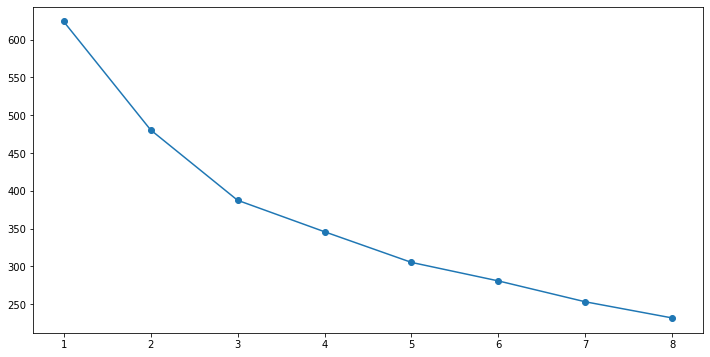

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o") 

### So, by using elbow analysis we got 3 as our optimum number of clusters

In [ ]:
# Calculate SC for k=2 through k=8
from sklearn import metrics

k_range = range(2, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_df_sc)
    scores.append(metrics.silhouette_score(cluster_df_sc, km.labels_))

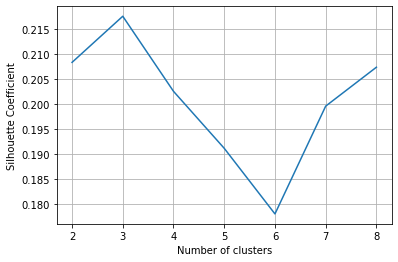

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### From silhouttee coefficients we are getting 3 as our optimum number of clusters

# Performing K-Means for 3 Number of Clusters

In [ ]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(cluster_df_sc)
y_predicted

array([0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2,
       2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0], dtype=int32)

In [ ]:
pd.Series(km.labels_).value_counts()

2    47
0    40
1    17
dtype: int64

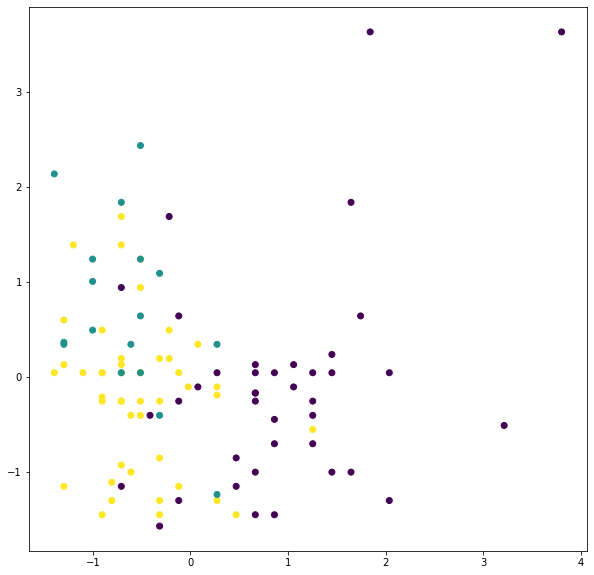

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(cluster_df_sc[:,0], cluster_df_sc[:,1], c=km.labels_)

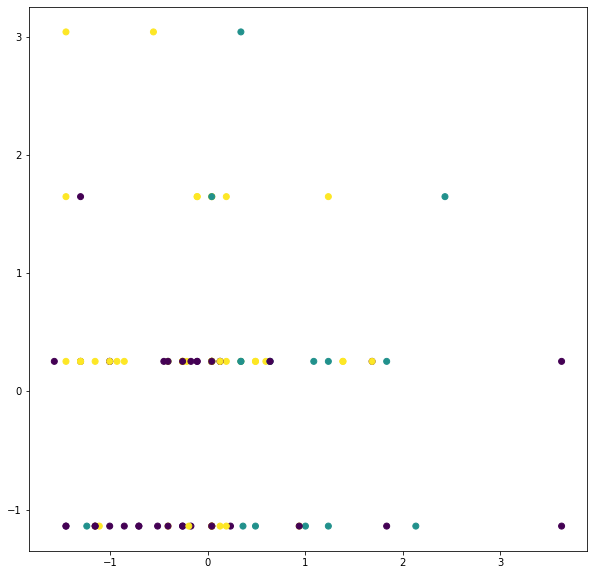

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(cluster_df_sc[:,1], cluster_df_sc[:,3], c=km.labels_)

In [ ]:
cluster_data['cluster'] = y_predicted

In [ ]:
cluster_data['Cuisines'] = cluster_data['Cuisines'].apply(lambda x : x.split(","))

In [ ]:
exploded = cluster_data.explode("Cuisines")

## Cuisines which are assigned in the cluster 0

In [ ]:
exploded[exploded["cluster"]==0]['Cuisines'].unique()

array(['north indian', ' chinese', ' continental', ' mediterranean',
       ' european', 'european', ' north indian', ' seafood', ' biryani',
       ' hyderabadi', 'continental', 'american', 'biryani',
       ' south indian', ' andhra', 'mediterranean', ' kebab', ' bbq',
       'chinese', ' italian', ' asian', ' mughlai', ' beverages',
       'modern indian', 'asian', ' desserts', ' spanish', ' japanese',
       ' salad', ' sushi', 'andhra', 'italian', 'mexican', 'kebab',
       'thai', ' malaysian', ' thai', ' indonesian', 'seafood', ' goan',
       'bbq', ' modern indian', ' finger food', 'healthy food'],
      dtype=object)

# Cuisines which are assigned in the cluster 1

In [ ]:
exploded[exploded["cluster"]==1]['Cuisines'].unique()

array(['ice cream', ' desserts', 'cafe', ' bakery', ' continental',
       ' fast food', ' beverages', 'desserts', ' cafe', ' burger',
       'fast food', ' biryani', 'bakery', ' north indian', ' mughlai',
       ' juices', ' chinese', ' mithai', 'american', ' wraps'],
      dtype=object)

# Cuisines which are assigned in the cluster 2

In [ ]:
exploded[exploded["cluster"]==2]['Cuisines'].unique()

array(['north indian', 'continental', ' american', ' chinese', 'american',
       ' fast food', ' salad', ' burger', ' biryani', ' mughlai', 'asian',
       'mughlai', 'chinese', ' seafood', ' asian', ' momos', 'fast food',
       ' pizza', 'burger', ' continental', 'biryani', ' north indian',
       'hyderabadi', ' japanese', ' sushi', 'finger food', ' kebab',
       'arabian', 'south indian', 'street food', ' arabian', 'momos',
       ' south indian', 'lebanese', ' andhra', ' thai', 'north eastern'],
      dtype=object)

In [ ]:
cluster_data['Cost'] = cluster_data['Cost'].str.replace(',', '')
cluster_data['Cost'] = cluster_data['Cost'].astype(int)

# Cost distribution per cluster

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

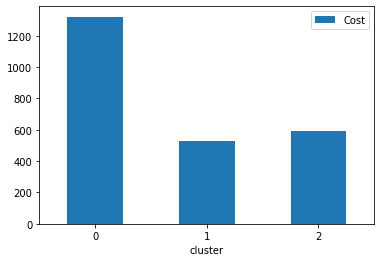

In [ ]:
pd.DataFrame(cluster_data.groupby('cluster')['Cost'].mean()).plot(kind="bar")
plt.xticks(rotation=0)

# Time distribution per cluster

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

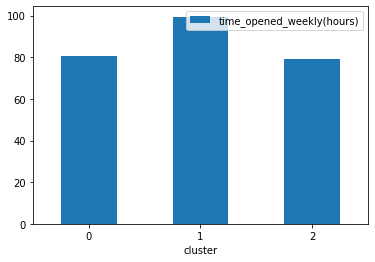

In [ ]:
pd.DataFrame(cluster_data.groupby('cluster')['time_opened_weekly(hours)'].mean()).plot(kind="bar")
plt.xticks(rotation=0)

In [ ]:
cluster_data.loc[:,['Name','Cost','Cuisines','time_opened_weekly(hours)','cluster']].head(30)

,Name,Cost,Cuisines,time_opened_weekly(hours),cluster
0,10 Downing Street,1900,"[north indian, chinese, continental]",84.0,0
1,13 Dhaba,450,[north indian],57.0,2
2,"3B's - Buddies, Bar & Barbecue",1100,"[north indian, mediterranean, european]",63.0,0
3,AB's - Absolute Barbecues,1500,"[european, mediterranean, north indian]",66.5,0
4,Absolute Sizzlers,750,"[continental, american, chinese]",94.5,2
5,Al Saba Restaurant,750,"[north indian, chinese, seafood, biryani, ...",122.5,0
6,American Wild Wings,600,"[american, fast food, salad, burger]",112.0,2
7,Amul,150,"[ice cream, desserts]",133.0,1
8,Angaara Counts 3,500,"[north indian, biryani, chinese]",77.0,2
9,Arena Eleven,1600,[continental],84.0,0


In [ ]:
cluster_data.drop("cluster",inplace=True,axis=1)

# K-Means Clustering For 4 Clusters

In [ ]:
km_4 = KMeans(n_clusters = 4)
y_predicted = km_4.fit_predict(cluster_df_sc)
y_predicted

array([1, 0, 3, 3, 3, 1, 3, 2, 0, 1, 0, 0, 3, 3, 1, 0, 0, 3, 0, 2, 1, 3,
       0, 1, 2, 0, 0, 0, 0, 3, 0, 2, 2, 1, 2, 1, 1, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 0, 2, 2, 2, 1, 0, 1, 0, 2, 3, 3, 1, 3, 0, 3, 0, 0,
       1, 3, 0, 0, 2, 1, 1, 1, 3, 1, 0, 3, 3, 3, 0, 3, 2, 3, 0, 2, 2, 1,
       2, 1, 1, 3, 2, 1, 0, 0, 3, 3, 3, 0, 1, 1, 3, 3], dtype=int32)

In [ ]:
cluster_data["cluster"] = y_predicted

# Scatter plot on the basis of 4-clusters

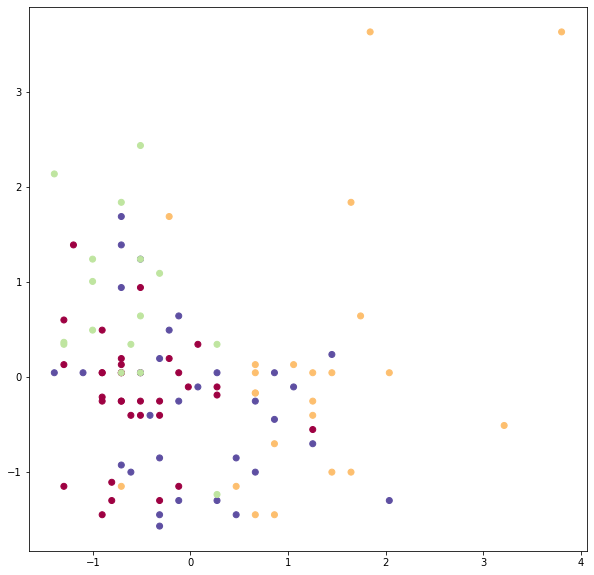

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(cluster_df_sc[:,0], cluster_df_sc[:,1], c=km_4.labels_, cmap = 'Spectral')

In [ ]:
exploded = cluster_data.explode('Cuisines')

# Cuisines which are assigned in the cluster 0 on the basis of 4-Clusters

In [ ]:
exploded[exploded['cluster']==0]['Cuisines'].unique()

array(['north indian', ' biryani', ' chinese', ' mughlai', 'asian',
       'mughlai', ' fast food', 'cafe', ' continental', ' desserts',
       'chinese', ' asian', ' momos', 'fast food', ' pizza', 'biryani',
       ' north indian', 'hyderabadi', 'burger', ' japanese', ' sushi',
       'finger food', ' kebab', 'momos', 'street food', ' burger',
       'continental'], dtype=object)

# Cuisines which are assigned in the cluster 1 on the basis of 4-Clusters

In [ ]:
exploded[exploded['cluster']==1]['Cuisines'].unique()

array(['north indian', ' chinese', ' continental', ' seafood', ' biryani',
       ' hyderabadi', 'continental', 'mediterranean', ' north indian',
       ' kebab', ' bbq', ' italian', ' asian', ' mughlai', ' beverages',
       'modern indian', 'asian', ' mediterranean', ' desserts', 'andhra',
       'italian', ' south indian', 'kebab', 'thai', ' malaysian',
       'seafood', ' goan', 'bbq', ' modern indian', ' sushi'],
      dtype=object)

# Cuisines which are assigned in the cluster 2 on the basis of 4-Clusters

In [ ]:
exploded[exploded['cluster']==2]['Cuisines'].unique()

array(['ice cream', ' desserts', 'cafe', ' bakery', ' fast food',
       ' beverages', 'desserts', ' cafe', ' burger', 'fast food',
       ' biryani', 'bakery', ' north indian', ' mughlai', ' juices',
       ' chinese', ' mithai', 'american', ' wraps'], dtype=object)

# Cuisines which are assigned in the cluster 3 on the basis of 4-Clusters

In [ ]:
exploded[exploded['cluster']==3]['Cuisines'].unique()

array(['north indian', ' mediterranean', ' european', 'european',
       ' north indian', 'continental', ' american', ' chinese',
       'american', ' fast food', ' salad', ' burger', 'biryani',
       ' south indian', ' andhra', 'chinese', ' continental', ' kebab',
       ' seafood', ' italian', ' spanish', 'burger', 'fast food',
       ' japanese', ' sushi', 'arabian', 'south indian', 'street food',
       ' arabian', 'mexican', ' biryani', ' beverages', 'lebanese',
       ' thai', ' indonesian', ' asian', 'italian', ' finger food',
       'andhra', 'asian', ' momos', 'north eastern', 'healthy food'],
      dtype=object)

# Cost Distribution per Cluster

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

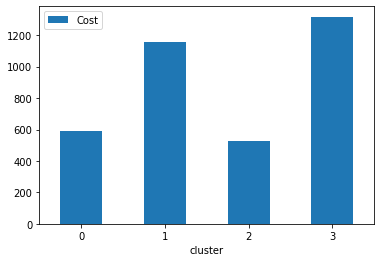

In [ ]:
pd.DataFrame(cluster_data.groupby('cluster')['Cost'].mean()).plot(kind='bar')
plt.xticks(rotation=0)

# Time Distrubution per Cluster

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

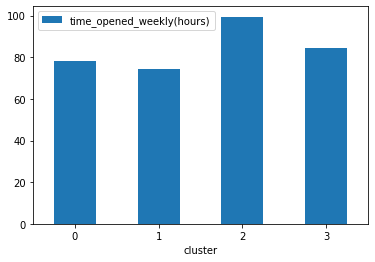

In [ ]:
pd.DataFrame(cluster_data.groupby('cluster')['time_opened_weekly(hours)'].mean()).plot(kind='bar')
plt.xticks(rotation=0)

# Herarchical Clustering

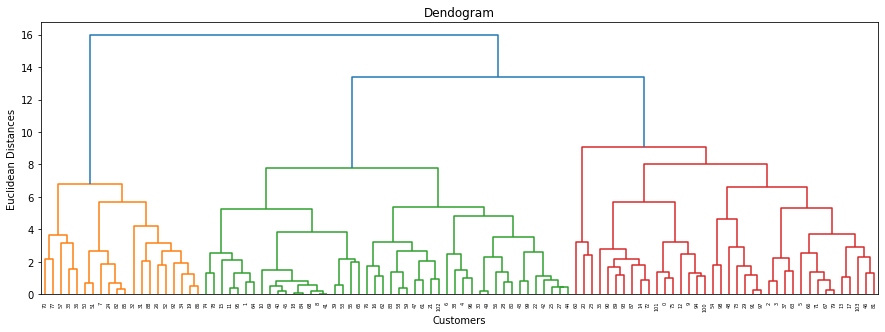

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,5))
dendogram = sch.dendrogram(sch.linkage(cluster_df_sc, method = 'ward'))

plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(cluster_df_sc)

In [ ]:
cluster_data['cluster_hr']=y_hc

In [ ]:
result = cluster_data.loc[:,['Name','Cost','Cuisines','time_opened_weekly(hours)','cluster','cluster_hr']]

In [ ]:
result.head(15)

,Name,Cost,Cuisines,time_opened_weekly(hours),cluster,cluster_hr
0,10 Downing Street,1900,"[north indian, chinese, continental]",84.0,3,0
1,13 Dhaba,450,[north indian],57.0,0,0
2,"3B's - Buddies, Bar & Barbecue",1100,"[north indian, mediterranean, european]",63.0,1,0
3,AB's - Absolute Barbecues,1500,"[european, mediterranean, north indian]",66.5,1,0
4,Absolute Sizzlers,750,"[continental, american, chinese]",94.5,0,0
5,Al Saba Restaurant,750,"[north indian, chinese, seafood, biryani, ...",122.5,3,0
6,American Wild Wings,600,"[american, fast food, salad, burger]",112.0,0,0
7,Amul,150,"[ice cream, desserts]",133.0,2,1
8,Angaara Counts 3,500,"[north indian, biryani, chinese]",77.0,0,0
9,Arena Eleven,1600,[continental],84.0,3,0


In [ ]:
result['cluster'] != result['cluster_hr']

0       True
1      False
2       True
3       True
4      False
       ...  
99     False
100     True
101     True
102    False
103     True
Length: 104, dtype: bool

In [ ]:
df = df1.merge(df2, left_on = 'Restaurant', right_on = 'Name').drop('Name', axis=1)

In [ ]:
df.shape

(10000, 13)

In [ ]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Collections,Cuisines,Timings,time_opened_weekly(hours)
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",52.5
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",52.5
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",52.5
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",52.5
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","chinese, continental, kebab, european, south i...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",52.5


In [ ]:
df.isnull().sum()

Restaurant                      0
Reviewer                       38
Review                         45
Rating                         38
Metadata                       38
Time                           38
Pictures                        0
Links                           0
Cost                            0
Collections                  5000
Cuisines                        0
Timings                       100
time_opened_weekly(hours)     100
dtype: int64

# Restaurant

In [ ]:
df['Restaurant'].nunique()

100

# **100 Restaurant information is Given**

In [ ]:
df['Restaurant'].value_counts()

Beyond Flavours                   100
Dine O China                      100
Driven Cafe                       100
Labonel                           100
Eat India Company                 100
                                 ... 
Pot Pourri                        100
Hunger Maggi Point                100
Behrouz Biryani                   100
3B's - Buddies, Bar & Barbecue    100
Chinese Pavilion                  100
Name: Restaurant, Length: 100, dtype: int64

## Each restaurant has 100 review 100*100=10000

# Review

In [ ]:
df[(df['Review'].isnull()) & df['Rating'].isnull()].shape

(38, 13)

In [ ]:
df[(df['Review'].isnull()) & df['Rating'].notnull()].shape

(7, 13)

In [ ]:
df[(df['Review'].isnull()) & df['Rating'].notnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Collections,Cuisines,Timings,time_opened_weekly(hours)
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"ice cream, desserts",10 AM to 5 AM,133.0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0,https://www.zomato.com/hyderabad/being-hungry-...,450,NaN,"north indian, chinese","12 Noon to 3 PM, 7 PM to 11:30 PM",52.5
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0,https://www.zomato.com/hyderabad/hyderabad-che...,600,NaN,"north indian, chinese",12 Noon to 10:30 PM,73.5
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0,https://www.zomato.com/hyderabad/hyderabad-che...,600,NaN,"north indian, chinese",12 Noon to 10:30 PM,73.5
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0,https://www.zomato.com/hyderabad/olive-garden-...,700,NaN,"north indian, chinese, continental, biryani","12 Noon to 3:30 PM, 7 PM to 11 PM",52.5
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0,https://www.zomato.com/hyderabad/al-saba-resta...,750,NaN,"north indian, chinese, seafood, biryani, hyder...",6 AM to 11:30 PM,122.5
8844,Domino's Pizza,Sayan Gupta,NaN,5,"2 Reviews , 2 Followers",8/9/2018 21:41,0,https://www.zomato.com/hyderabad/dominos-pizza...,400,NaN,"fast food, pizza",11 AM to 11 PM,84.0


# Rating

In [ ]:
df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [ ]:
df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

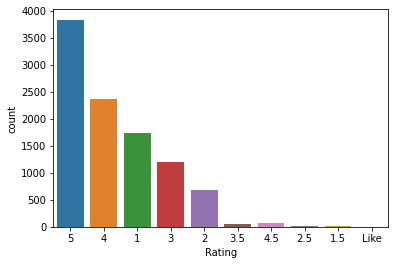

In [ ]:
sns.countplot(df['Rating'])

In [ ]:
df_like = df[df['Rating'] == 'Like']

In [ ]:
df_like['Rating'] = '5'

In [ ]:
df = df[df['Rating'] != 'Like']

In [ ]:
df.shape

(9999, 13)

In [ ]:
df = pd.concat([df,df_like])

In [ ]:
df.shape

(10000, 13)

In [ ]:
#Changing data type of Rating
df['Rating'] = df['Rating'].astype(float)

In [ ]:
df[df['Rating'].isnull()].head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Collections,Cuisines,Timings,time_opened_weekly(hours)
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"american, fast food, salad, burger",12 Noon to 4 AM,112.0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"american, fast food, salad, burger",12 Noon to 4 AM,112.0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"american, fast food, salad, burger",12 Noon to 4 AM,112.0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"american, fast food, salad, burger",12 Noon to 4 AM,112.0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"american, fast food, salad, burger",12 Noon to 4 AM,112.0


In [ ]:
df[df['Rating'].isnull()]['Restaurant'].nunique()

2

## **There are duplicates in dataset and as rating and text review is not available so we can drop this rows**

In [ ]:
df = df.drop_duplicates(subset=df.columns, keep=False)

In [ ]:
df.shape

(9962, 13)

## **38 Duplicates are present**

# Cost

In [ ]:
df['Cost'] = df['Cost'].str.replace(',', '')

In [ ]:
df['Cost'] = df['Cost'].astype(float)

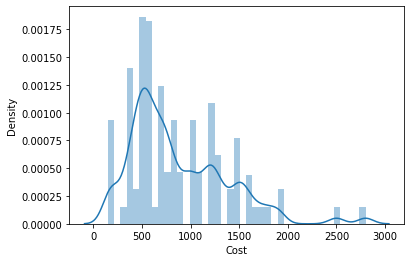

In [ ]:
sns.distplot(df['Cost'])

# Collections

In [ ]:
df[df['Collections'].isnull()]['Restaurant'].nunique()

50

# Cuisines

In [ ]:
cuisines = df2['Cuisines']
cuisines = cuisines.apply(lambda x : x.lower())

In [ ]:
from collections import Counter

In [ ]:
all_cuisines = ', '.join(i for i in cuisines.tolist())
print(all_cuisines)
all_cuisines = Counter(all_cuisines.split(', '))
print(all_cuisines)
all_cuisines = pd.DataFrame.from_dict(all_cuisines, orient = 'index', dtype = 'int')
all_cuisines.columns = ['No of Restaurants']
all_cuisines.sort_values(by='No of Restaurants', ascending = False, inplace = True)
cuisines = pd.DataFrame(all_cuisines[0:10])
cuisines

chinese, continental, kebab, european, south indian, north indian, biryani, north indian, chinese, asian, mediterranean, north indian, desserts, biryani, north indian, chinese, seafood, beverages, asian, continental, north indian, chinese, mediterranean, seafood, goan, north indian, continental, asian, healthy food, north indian, continental, south indian, lebanese, american, chinese, north indian, kebab, south indian, ice cream, desserts, street food, north indian, fast food, mediterranean, north indian, kebab, bbq, continental, american, chinese, north indian, italian, finger food, european, mediterranean, north indian, burger, fast food, north indian, chinese, north indian, north indian, chinese, continental, north indian, chinese, biryani, north indian, north indian, japanese, italian, salad, sushi, american, ice cream, desserts, north indian, chinese, continental, continental, mexican, italian, north indian, chinese, salad, north indian, mediterranean, european, mughlai, biryani, 

,No of Restaurants
north indian,61
chinese,43
continental,21
biryani,16
fast food,15
asian,15
italian,14
desserts,13
south indian,9
bakery,7


# Sentiment Analysis

In [ ]:
sent_df = df.loc[:,['Review', 'Rating']]

In [ ]:
# Drop Review having nan
sent_df = sent_df.dropna()

In [ ]:
sent_df.head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0


In [ ]:
sent_df.set_index("Review", inplace = True)

In [ ]:
# Reading Review for rating 3
a = sent_df[sent_df['Rating']==3]

In [ ]:
a.head()

,Rating
Review,
"Short review: Decent breads and starters, bad Shaam Savera, a little screwed up daal makhni (but should be a one-off case)\nBetter ambience at night... And importantly good quantity!\nI wanted to give a 2.5 but that's not an option 🙈\nExtensive...\nAmbience: It's better at night. Friends who had been here during the day didn't like it much. So if you prefer ambience, go at night!\nFood! Ordered a Hara Bhara Kebab, Shaam Savera, Daal Makhni, rotis and raita (Yes! I'm a vegetarian 🙈)\nThe good part! Quantity 😍\nI was excited to see Shaam Savera on their menu. But take it from me, you do not want to order it. It is no where close to what it should be. They messed it up real bad, especially the colors.\nThe daal makhni had big chunks of garlic cloves which spoiled it for me. It wasn't creamy too :(\nThe breads and raita were decent!\nThe Hara Bhara Kebabs were decent too, soft! They had an extra outer coating of peanuts. So if you're not a peanut fan on your kebabs, ask them to skip that step 🙈\nConclusion: It looked like they had made food in a hurry.\nWould like to give this place another try hoping that mine was one of the odd cases. If things change, you'll know!",3.0
The reason for giving only a 3 star is because of the longlong time wait for the tables. We went on Friday afternoon. We waited almost more than 30mins to get a table. We lost our patience and left for another restaurant as v didn't get a table even aftr waiting for such a long time.I think restaurant management should take this into consideration and try to decrease the waiting time of customer.,3.0
"We went for lunch buffet yesterday and took a chance after seeing some good and some average reviews in Zomato.\n\nThe spread in buffet is too less, just 3 veg and 3 non veg starters, 2 main course in veg and non veg, just one fried rice and chicken Biryani.\nDesserts are ice cream and jamun.\n\nThe taste was ok and not to expect too much. Little disappointing when starters are not hot.\n\nFish fry was decent, Schezwan chicken was ok.\nVeg spring rolls were too good.\nBig surprise for me is Onion rings as starters 🤣😂\n\nKadai ghost in main course was good but missing that masala flavour.\nChicken was ok. Biryani is average, egg fried rice was good.\n\nFor the money we pay, we expect some good food. They use much of colour in food item's.\n\nSuggestion to management is use less coating and less food colouring in starters.\n\nOverall experience is ok, but they can be much better for the amount you pay.",3.0
"We happened to go to this place on last sunday and it was mothers day and they had flat 50 on the buffet meal for the mother which i really liked..Needless to say the Ambience and music was really good .We had a reservation but had to wait fir 10 mins to get a seat..They served us mango juice as wrlcome drink which tasted really good.The buffet spread was one of a kind:\nStrters : Veg : paneer tikka, veg spring roll and veg cutlet.They were lil cold but the taste wad good\nNon veg : chicken kebab , chicken manchurian and fish .Fish was very tasty though it coupd taste better if it was hot.Chicken was fair enuf.\nSingapore Noodles,Egg salad and pasta : They were good but it was cold.\nMain course: mutton rogan josh, chicken tikka masala,palak paneer All were equally good\nBiriyani: Egg frued rice and chicken biriyani were really great.\nDesserts : moong dal halwa tasted really yumm, ice cream,gulab jamun,cut fruits,banana cake\n\nThe staff were too slow in service and the food was refilles very slow.We had to wait for quite long time to actually eat to stomach full.\n\nThey could improve the above points to stand better!\nOverall :3.2",3.0
"I have been to this place twice and had 2 different experiences.\n1st time it was with colleagues and I loved the food and ambience and service and everything except the prices as it was too costly. Their special baked biriyani is work a try, it's unique and tasty.\nBecause of the good experience I revisited thi

## **Some Emojis, \n and Numbers are present in review**

In [ ]:
a = sent_df[sent_df['Rating'] == 3.5]

In [ ]:
a.head(10)

,Rating
Review,
It's too crowded with delivery executives all the time.. Don't find place to sit mostly. It'd be better if they provide some way out. Preferable to online order than physical visit.,3.5
Nice pocket friendly place. Burgers and sandwiches are tasty and value for money. The have a wide variety of different pastries. The upper section is very nice to spend time chatting and munching.,3.5
"Well, all the time I have ordered here it has been Veg Corn Burger and Paneer Cheese Roll.\nThey are too sweet to be considered as fast foods.\nThe pastery I tried once was over moist. Don't know why but I guess the refrigerator wasn't working well.\n\nThe have a really good value for money. But I have seen that they don't make burgers and rolls at that time. They simply defrost the frozen food in the microwave and put in some mayo and sauce and give it.\n\nQuality: 3/5\nQuantity: 4/5\nAmbience: 3/5 Nothing extra ordinary.\nValue for money: 4.5/5",3.5
chocolate truffle is great here!\nFerrerro rocher pastry melts in your mouth like lava...\nPleasant place....sets the mood for a cake\n\n\nyummmmmyyyyyyyyyyyyyyyyyyyyyy,3.5
"KS bakers , known for its food in bakery items.\nOrdered Veg hot dogs,\nPremium butter scotch pastry,\nItalian chocolate pastry,\nVeg hot dog, stuffed with Aloo, onions , tomato slices and mayonnaise , tastes good.\nPastries are also worth a try.\n\nOverall ok.",3.5
Ordered chicken and cheese burger and egg puff from here. The burger was nice with an overload of cheese. Really liked the packaging. Egg puff was also tasty. A decent bakery with some good food and affordable prices.,3.5
"The burger was just decent but complete value for money at 75 bucks! The ""Premium"" Butterscotch pastry was a letdown though. Also ordered ""Tangdi Kabab"" and found it decent.\n\nThis place's USP is value for money. The rates are really nominal & easy on pocket.",3.5
It's a good option but the bread they use for hot dogs and burgers is something which has to be improved. Burgers buns are too thick and the patty and filling at times is way too oily. They have pretty good dining area too on the first floor. The place is neat and service is pretty fast. Being an old brand catering to twin cities this place has always been a good option to grab some quick bites and lip smacking pastries.,3.5
"Neat and clean ambiance. Small place but it's worth a visit. I took snack boxes from here for an office event. Try muffins, they were of amazing taste which was liked by almost 200people in my team.\nOn time Delivery dint happened for me which was little disappointing but rest all was perfect .",3.5


In [ ]:
#Review Counts
sent_df['Rating'].value_counts()

5.0    3827
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [ ]:
sent_df.isnull().sum()

Rating    0
dtype: int64

### Sentiment is greater than 3.5 than map it to 1


### Sentiment is less than 3.5 than map it to 0

In [ ]:
def sentiment(rating):
  if rating > 3.5:
    return 1 
  else:
    return 0

In [ ]:
sent_df['sentiment'] = sent_df['Rating'].apply(lambda x : sentiment(x))

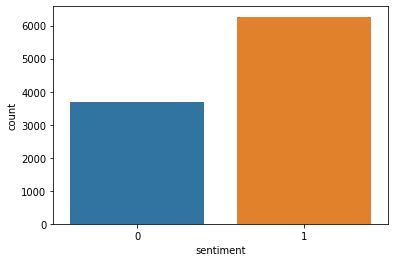

In [ ]:
sns.countplot(sent_df['sentiment'])

In [ ]:
sent_df.reset_index(inplace=True)

In [ ]:
sent_df.head()

,Review,Rating,sentiment
0,"The ambience was good, food was quite good . h...",5.0,1
1,Ambience is too good for a pleasant evening. S...,5.0,1
2,A must try.. great food great ambience. Thnx f...,5.0,1
3,Soumen das and Arun was a great guy. Only beca...,5.0,1
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,1


# **Text Preprocessing**

## Removing Emojis

In [ ]:
import re

In [ ]:
def deEmojify(text):
  regrex_pattern = re.compile(pattern = "["
       u"\U0001F600-\U0001F64F"
       u"\U0001F300-\U0001F5FF"
       u"\U0001F680-\U0001F6FF"
       u"\U0001F1E0-\U0001F1FF"
                            "]+", flags = re.UNICODE )
  return regrex_pattern.sub(r'', text)

In [ ]:
sent_df['Review'] = sent_df['Review'].apply(lambda x:deEmojify(x))

In [ ]:
a = sent_df[sent_df['Rating'] == 3.5]
a.set_index("Review", inplace=True)

In [ ]:
a.head(10)

,Rating,sentiment
Review,,
It's too crowded with delivery executives all the time.. Don't find place to sit mostly. It'd be better if they provide some way out. Preferable to online order than physical visit.,3.5,0
Nice pocket friendly place. Burgers and sandwiches are tasty and value for money. The have a wide variety of different pastries. The upper section is very nice to spend time chatting and munching.,3.5,0
"Well, all the time I have ordered here it has been Veg Corn Burger and Paneer Cheese Roll.\nThey are too sweet to be considered as fast foods.\nThe pastery I tried once was over moist. Don't know why but I guess the refrigerator wasn't working well.\n\nThe have a really good value for money. But I have seen that they don't make burgers and rolls at that time. They simply defrost the frozen food in the microwave and put in some mayo and sauce and give it.\n\nQuality: 3/5\nQuantity: 4/5\nAmbience: 3/5 Nothing extra ordinary.\nValue for money: 4.5/5",3.5,0
chocolate truffle is great here!\nFerrerro rocher pastry melts in your mouth like lava...\nPleasant place....sets the mood for a cake\n\n\nyummmmmyyyyyyyyyyyyyyyyyyyyyy,3.5,0
"KS bakers , known for its food in bakery items.\nOrdered Veg hot dogs,\nPremium butter scotch pastry,\nItalian chocolate pastry,\nVeg hot dog, stuffed with Aloo, onions , tomato slices and mayonnaise , tastes good.\nPastries are also worth a try.\n\nOverall ok.",3.5,0
Ordered chicken and cheese burger and egg puff from here. The burger was nice with an overload of cheese. Really liked the packaging. Egg puff was also tasty. A decent bakery with some good food and affordable prices.,3.5,0
"The burger was just decent but complete value for money at 75 bucks! The ""Premium"" Butterscotch pastry was a letdown though. Also ordered ""Tangdi Kabab"" and found it decent.\n\nThis place's USP is value for money. The rates are really nominal & easy on pocket.",3.5,0
It's a good option but the bread they use for hot dogs and burgers is something which has to be improved. Burgers buns are too thick and the patty and filling at times is way too oily. They have pretty good dining area too on the first floor. The place is neat and service is pretty fast. Being an old brand catering to twin cities this place has always been a good option to grab some quick bites and lip smacking pastries.,3.5,0
"Neat and clean ambiance. Small place but it's worth a visit. I took snack boxes from here for an office event. Try muffins, they were of amazing taste which was liked by almost 200people in my team.\nOn time Delivery dint happened for me which was little disappointing but rest all was perfect .",3.5,0


## Removing Ratings and \n from review

In [ ]:
def remove_rating(rating):
  rating=re.sub(r'([0.-9.]+/+[0.-9.]+)','',rating) #using regx
  rating=re.sub(r'(\n+)','',rating)
  return rating

In [ ]:
sent_df['Review']=sent_df['Review'].apply(lambda x:remove_rating(x))

In [ ]:
a=sent_df[sent_df['Rating']==3.5]
a.set_index("Review", inplace = True)

In [ ]:
a.head(10)

,Rating,sentiment
Review,,
It's too crowded with delivery executives all the time.. Don't find place to sit mostly. It'd be better if they provide some way out. Preferable to online order than physical visit.,3.5,0
Nice pocket friendly place. Burgers and sandwiches are tasty and value for money. The have a wide variety of different pastries. The upper section is very nice to spend time chatting and munching.,3.5,0
"Well, all the time I have ordered here it has been Veg Corn Burger and Paneer Cheese Roll.They are too sweet to be considered as fast foods.The pastery I tried once was over moist. Don't know why but I guess the refrigerator wasn't working well.The have a really good value for money. But I have seen that they don't make burgers and rolls at that time. They simply defrost the frozen food in the microwave and put in some mayo and sauce and give it.Quality: Quantity: Ambience: Nothing extra ordinary.Value for money:",3.5,0
chocolate truffle is great here!Ferrerro rocher pastry melts in your mouth like lava...Pleasant place....sets the mood for a cakeyummmmmyyyyyyyyyyyyyyyyyyyyyy,3.5,0
"KS bakers , known for its food in bakery items.Ordered Veg hot dogs,Premium butter scotch pastry,Italian chocolate pastry,Veg hot dog, stuffed with Aloo, onions , tomato slices and mayonnaise , tastes good.Pastries are also worth a try.Overall ok.",3.5,0
Ordered chicken and cheese burger and egg puff from here. The burger was nice with an overload of cheese. Really liked the packaging. Egg puff was also tasty. A decent bakery with some good food and affordable prices.,3.5,0
"The burger was just decent but complete value for money at 75 bucks! The ""Premium"" Butterscotch pastry was a letdown though. Also ordered ""Tangdi Kabab"" and found it decent.This place's USP is value for money. The rates are really nominal & easy on pocket.",3.5,0
It's a good option but the bread they use for hot dogs and burgers is something which has to be improved. Burgers buns are too thick and the patty and filling at times is way too oily. They have pretty good dining area too on the first floor. The place is neat and service is pretty fast. Being an old brand catering to twin cities this place has always been a good option to grab some quick bites and lip smacking pastries.,3.5,0
"Neat and clean ambiance. Small place but it's worth a visit. I took snack boxes from here for an office event. Try muffins, they were of amazing taste which was liked by almost 200people in my team.On time Delivery dint happened for me which was little disappointing but rest all was perfect .",3.5,0


## Lower Case Conversion

In [ ]:
sent_df['Review'] = sent_df['Review'].apply(lambda x:x.lower())

In [ ]:
sent_df.head()

,Review,Rating,sentiment
0,"the ambience was good, food was quite good . h...",5.0,1
1,ambience is too good for a pleasant evening. s...,5.0,1
2,a must try.. great food great ambience. thnx f...,5.0,1
3,soumen das and arun was a great guy. only beca...,5.0,1
4,food is good.we ordered kodi drumsticks and ba...,5.0,1


## Getting Verb and Adjective

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])


def get_adj_VERB(text):
    # create spacy 
    doc = nlp(text)
    noun_adj=[]
    for token in doc:
        # check token pos
        if token.pos_=='ADJ' or token.pos_=='VERB' :
            
            noun_adj.append(token.text)

    return ' '.join(noun_adj)

In [ ]:
sent_df['verb_adj']=sent_df['Review'].apply(lambda x:get_adj_VERB(x))

In [ ]:
sent_df.head()

,Review,Rating,sentiment,verb_adj
0,"the ambience was good, food was quite good . h...",5.0,1,good good had cost effective chill courteous h...
1,ambience is too good for a pleasant evening. s...,5.0,1,good pleasant prompt good good
2,a must try.. great food great ambience. thnx f...,5.0,1,try great great subroto personal amazing
3,soumen das and arun was a great guy. only beca...,5.0,1,great good like visit
4,food is good.we ordered kodi drumsticks and ba...,5.0,1,ordered good pradeep served enjoyed good


## Remove Number

In [ ]:
def remove_number(x):
  output = re.sub(r'\d+[a-zA-Z0-9_.+-]+', '',x)
  output = re.sub(r'[a-zA-Z0-9_.+-]+\d', '',output)
  output = re.sub(r'\d+', '',output)
  return output

In [ ]:
sent_df['Review'] = sent_df['Review'].apply(lambda x : remove_number(x))
sent_df['verb_adj'] = sent_df['verb_adj'].apply(lambda x : remove_number(x))

## Convert Short Form

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 18.2 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
sent_df['Review'] = sent_df['Review'].apply(lambda x : contractions.fix(x))
sent_df['verb_adj'] = sent_df['verb_adj'].apply(lambda x : contractions.fix(x))

In [ ]:
a = sent_df[sent_df['Rating'] == 3.5]
a.set_index('Review', inplace=True)

In [ ]:
a.head()

,Rating,sentiment,verb_adj
Review,,,
it is too crowded with delivery executives all the time.. do not find place to sit mostly. it would be better if they provide some way out. preferable to online order than physical visit.,3.5,0,crowded find sit better provide preferable onl...
nice pocket friendly place. burgers and sandwiches are tasty and value for money. the have a wide variety of different pastries. the upper section is very nice to spend time chatting and munching.,3.5,0,nice friendly tasty have wide different upper ...
"well, all the time i have ordered here it has been veg corn burger and paneer cheese roll.they are too sweet to be considered as fast foods.the pastery i tried once was over moist. do not know why but i guess the refrigerator was not working well.the have a really good value for money. but i have seen that they do not make burgers and rolls at that time. they simply defrost the frozen food in the microwave and put in some mayo and sauce and give it.quality: quantity: ambience: nothing extra ordinary.value for money:",3.5,0,ordered veg sweet considered fast tried know g...
chocolate truffle is great here!ferrerro rocher pastry melts in your mouth like lava...pleasant place....sets the mood for a cakeyummmmmyyyyyyyyyyyyyyyyyyyyyy,3.5,0,great pleasant sets
"ks bakers , known for its food in bakery items.ordered veg hot dogs,premium butter scotch pastry,italian chocolate pastry,veg hot dog, stuffed with aloo, onions , tomato slices and mayonnaise , tastes good.pastries are also worth a try.overall ok.",3.5,0,known items.ordered hot italian veg hot stuffe...


## Remove Multiple spaces

In [ ]:
sent_df['Review'] = sent_df['Review'].apply(lambda x : ' '.join(x.split()))
sent_df['verb_adj'] = sent_df['verb_adj'].apply(lambda x : ' '.join(x.split()))

In [ ]:
sent_df.head()

,Review,Rating,sentiment,verb_adj
0,"the ambience was good, food was quite good . h...",5.0,1,good good had cost effective chill courteous h...
1,ambience is too good for a pleasant evening. s...,5.0,1,good pleasant prompt good good
2,a must try.. great food great ambience. thnx f...,5.0,1,try great great subroto personal amazing
3,soumen das and arun was a great guy. only beca...,5.0,1,great good like visit
4,food is good.we ordered kodi drumsticks and ba...,5.0,1,ordered good pradeep served enjoyed good


## Remove Punctuations or Special Char

In [ ]:
import string

In [ ]:
def text_process(msg):
  nonpunc = [char for char in msg if char not in string.punctuation]
  nonpunc = ''.join(nonpunc)
  return nonpunc

In [ ]:
sent_df['Review'] = sent_df['Review'].apply(text_process)
sent_df['verb_adj'] = sent_df['verb_adj'].apply(text_process)

In [ ]:
sent_df.head()

,Review,Rating,sentiment,verb_adj
0,the ambience was good food was quite good had...,5.0,1,good good had cost effective chill courteous h...
1,ambience is too good for a pleasant evening se...,5.0,1,good pleasant prompt good good
2,a must try great food great ambience thnx for ...,5.0,1,try great great subroto personal amazing
3,soumen das and arun was a great guy only becau...,5.0,1,great good like visit
4,food is goodwe ordered kodi drumsticks and bas...,5.0,1,ordered good pradeep served enjoyed good


## Remove Stop Words

In [ ]:
import spacy

In [ ]:
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words

print('There are :', len(sw_spacy), 'Stop words in nltk')

There are : 326 Stop words in nltk


In [ ]:
list(sw_spacy)[0:10]

['against',
 'are',
 'or',
 'name',
 'beyond',
 'take',
 'without',
 'almost',
 'thru',
 '’ve']

In [ ]:
sent_df['Review'] = sent_df['Review'].apply(lambda x: ' '.join([i for i in x.split() if i not in sw_spacy]))
sent_df['verb_adj'] = sent_df['verb_adj'].apply(lambda x: ' '.join([i for i in x.split() if i not in sw_spacy]))

In [ ]:
sent_df.head()

,Review,Rating,sentiment,verb_adj
0,ambience good food good saturday lunch cost ef...,5.0,1,good good cost effective chill courteous helpful
1,ambience good pleasant evening service prompt ...,5.0,1,good pleasant prompt good good
2,try great food great ambience thnx service pra...,5.0,1,try great great subroto personal amazing
3,soumen das arun great guy behavior sincerety g...,5.0,1,great good like visit
4,food goodwe ordered kodi drumsticks basket mut...,5.0,1,ordered good pradeep served enjoyed good


## Converting Word to Root form

In [ ]:
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-24 16:44:04.588297: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
spacy.load('en_core_web_sm')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatization_(sentence):
  doc = nlp(sentence)
  l = list()
  for word in doc:
    l.append(word.lemma_)

  return ' '.join(l)

In [ ]:
sent_df['Review']=sent_df['Review'].apply(lambda x:lemmatization_(x))
sent_df['verb_adj']=sent_df['verb_adj'].apply(lambda x:lemmatization_(x))

In [ ]:
sent_df.head()

,Review,Rating,sentiment,verb_adj
0,ambience good food good saturday lunch cost ef...,5.0,1,good good cost effective chill courteous helpful
1,ambience good pleasant evening service prompt ...,5.0,1,good pleasant prompt good good
2,try great food great ambience thnx service pra...,5.0,1,try great great subroto personal amazing
3,soumen das arun great guy behavior sincerety g...,5.0,1,great good like visit
4,food goodwe order kodi drumstick basket mutton...,5.0,1,order good pradeep serve enjoy good


In [ ]:
' '.join(sent_df['Review'])

'ambience good food good saturday lunch cost effective good place sate brunch chill friend parentswaiter soumen das courteous helpful ambience good pleasant evening service prompt food good good experience souman das kudo service try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing soumen das arun great guy behavior sincerety good food course like visit place food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good ambiance good service good food apradeecp subro well servicefood good papiya good hostess caption good restaurant nice place ambience different food order tasty service gud worth visit reasonable visit place reading review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flattering claim staff polite prompt especially pradeep suman excellent food specially like spicy food courteous staff shubro prad

In [ ]:
word = ' '.join(sent_df['Review']).split()
words_df = pd.Series(word)

In [ ]:
top10 = words_df.value_counts()[0:10]
top10

good       7747
food       5913
place      5816
order      3462
chicken    2909
service    2791
taste      2742
try        1903
time       1872
visit      1837
dtype: int64

In [ ]:
word=' '.join(sent_df['verb_adj'])
word=' '.join(sent_df['verb_adj']).split()
word_df=pd.Series(word)

In [ ]:
sent_df.head()

,Review,Rating,sentiment,verb_adj
0,ambience good food good saturday lunch cost ef...,5.0,1,good good cost effective chill courteous helpful
1,ambience good pleasant evening service prompt ...,5.0,1,good pleasant prompt good good
2,try great food great ambience thnx service pra...,5.0,1,try great great subroto personal amazing
3,soumen das arun great guy behavior sincerety g...,5.0,1,great good like visit
4,food goodwe order kodi drumstick basket mutton...,5.0,1,order good pradeep serve enjoy good


In [ ]:
rare_word_noun = word_df.value_counts(ascending=True)[:5050]

In [ ]:
rare_word_noun

wager       1
secured     1
inste       1
shree       1
nirmal      1
           ..
earthy      4
diluted     4
flawless    4
nominal     4
opp         4
Length: 5050, dtype: int64

### Remove Rare Word whose count is less than 3

In [ ]:
sent_df['verb_adj'] = sent_df['verb_adj'].apply(lambda x : ' '.join([i for i in x.split() if i not in rare_word_noun]))

In [ ]:
rare_word = words_df.value_counts(ascending = True)[0:20000]
rare_word

readonable        1
basque            1
snackingcoffee    1
seeker            1
gelatos           1
                 ..
mawa              8
y                 8
experiment        8
pink              8
sophisticated     8
Length: 20000, dtype: int64

In [ ]:
# Remove Rare Words
sent_df['Review'] = sent_df['Review'].apply(lambda x : ' '.join([i for i in x.split() if i not in rare_word]))

### Keeping Words having length between 2 to 40

In [ ]:
def len_less_than2(review):
  review = ' '.join([i for i in review.split() if len(i) > 3])
  review = ' '.join([i for i in review.split() if len(i) < 40])
  return review

In [ ]:
sent_df['Review'] = sent_df['Review'].apply(lambda x : len_less_than2(x))
sent_df['verb_adj'] = sent_df['verb_adj'].apply(lambda x : len_less_than2(x))

In [ ]:
from wordcloud import WordCloud

Most common words in review


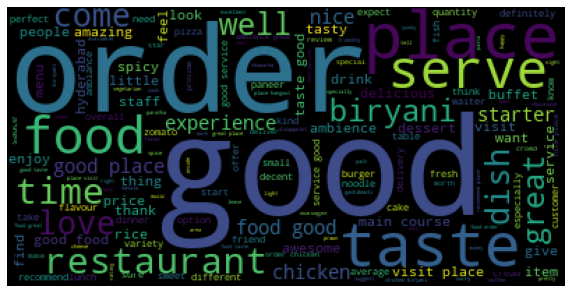

In [ ]:
print('Most common words in review')
plt.figure(figsize = (10,10))
wc = WordCloud().generate(' '.join(sent_df['Review']))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Most Common Verbs and Adjective

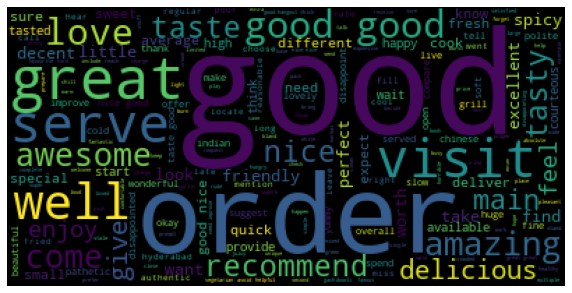

In [ ]:
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(' '.join(sent_df['verb_adj']))
plt.imshow(wc)
plt.axis('off')
plt.show()

# TfidfVectorizer

In [ ]:
x = sent_df['Review']
y = sent_df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(x, y, test_size = 0.30, stratify = sent_df['sentiment'])

In [ ]:
label_test.value_counts()

1    1881
0    1106
Name: sentiment, dtype: int64

In [ ]:
label_train.value_counts()

1    4388
0    2580
Name: sentiment, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfid_vectorizer = TfidfVectorizer()

In [ ]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(msg_train)
x_test = vectorizer.transform(msg_test)

In [ ]:
train_array = x_train.toarray()
test_array = x_test.toarray()

In [ ]:
tfidf_df = pd.DataFrame(train_array, columns = vectorizer.get_feature_names())

In [ ]:
tfidf_df

,able,absolute,absolutely,accept,acceptable,accessible,accommodate,accompaniment,accompany,accord,...,young,yumm,yummm,yummy,zafrani,zega,zero,zing,zinger,zomato
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091145


# MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(train_array, label_train)

train_preds = model.predict(train_array)
test_preds = model.predict(test_array)

print(classification_report(label_train, train_preds))
print("\n")
print(classification_report(label_test, test_preds))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      2580
           1       0.83      0.96      0.89      4388

    accuracy                           0.85      6968
   macro avg       0.87      0.81      0.83      6968
weighted avg       0.86      0.85      0.85      6968



              precision    recall  f1-score   support

           0       0.86      0.64      0.74      1106
           1       0.82      0.94      0.87      1881

    accuracy                           0.83      2987
   macro avg       0.84      0.79      0.80      2987
weighted avg       0.83      0.83      0.82      2987



In [ ]:
print(confusion_matrix(label_train, train_preds))
print(confusion_matrix(label_test, test_preds))

[[1730  850]
 [ 178 4210]]
[[ 709  397]
 [ 114 1767]]


In [ ]:
print('roc_auc_score for train set : ', roc_auc_score(label_train, train_preds))
print('roc_auc_score for test set : ', roc_auc_score(label_test, test_preds))

roc_auc_score for train set :  0.8149887289506972
roc_auc_score for test set :  0.790221381993534


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
w = {0: 2.0, 1: 1.0}

In [ ]:
clf = LogisticRegression(class_weight = w, max_iter = 1000)
clf.fit(train_array, label_train)

LogisticRegression(class_weight={0: 2.0, 1: 1.0}, max_iter=1000)

In [ ]:
train_preds = clf.predict(train_array)
test_preds = clf.predict(test_array)

In [ ]:
print(classification_report(label_train, train_preds))
print("\n")
print(classification_report(label_test, test_preds))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2580
           1       0.94      0.85      0.90      4388

    accuracy                           0.87      6968
   macro avg       0.86      0.88      0.87      6968
weighted avg       0.88      0.87      0.88      6968



              precision    recall  f1-score   support

           0       0.70      0.87      0.78      1106
           1       0.91      0.78      0.84      1881

    accuracy                           0.82      2987
   macro avg       0.81      0.83      0.81      2987
weighted avg       0.83      0.82      0.82      2987



In [ ]:
print('roc_auc_score for train set : ', roc_auc_score(label_train, train_preds))
print('roc_auc_score for test set : ', roc_auc_score(label_test, test_preds))

roc_auc_score for train set :  0.882808823217655
roc_auc_score for test set :  0.8258888014051239


In [ ]:
print(confusion_matrix(label_train, train_preds))
print(confusion_matrix(label_test, test_preds))

[[2361  219]
 [ 656 3732]]
[[ 959  147]
 [ 405 1476]]


# Decision Tree Classifier

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'gini')
tuned_parameters = {'max_depth': [3,5,7,9,11,13], 'max_leaf_nodes': [19,21,23,25]}
classifier = GridSearchCV(classifier, tuned_parameters, cv=5, scoring = 'accuracy')
classifier.fit(train_array, label_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_leaf_nodes': [19, 21, 23, 25]},
             scoring='accuracy')

In [ ]:
classifier.best_params_

{'max_depth': 13, 'max_leaf_nodes': 25}

In [ ]:
classifier = DecisionTreeClassifier(max_depth = 13, max_leaf_nodes = 25)
classifier.fit(train_array, label_train)

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=25)

In [ ]:
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

In [ ]:
print(classification_report(label_train, train_preds))
print("\n")
print(classification_report(label_test, test_preds))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69      2580
           1       0.81      0.85      0.83      4388

    accuracy                           0.78      6968
   macro avg       0.77      0.76      0.76      6968
weighted avg       0.78      0.78      0.78      6968



              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1106
           1       0.80      0.84      0.82      1881

    accuracy                           0.76      2987
   macro avg       0.75      0.74      0.74      2987
weighted avg       0.76      0.76      0.76      2987



In [ ]:
print('roc_auc_score for train set : ', roc_auc_score(label_train, train_preds))
print('roc_auc_score for test set : ', roc_auc_score(label_test, test_preds))

roc_auc_score for train set :  0.7560413177587925
roc_auc_score for test set :  0.7379875657690447


# Random Forest Classifier

In [ ]:
grid_values = {'n_estimators':[50,75,100,300], 'max_depth':[3,7, 9, 11, 13]}
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 7, 9, 11, 13],
                         'n_estimators': [50, 75, 100, 300]},
             scoring='accuracy')

In [ ]:
classifier.best_params_

{'max_depth': 13, 'n_estimators': 100}

In [ ]:
classifier = RandomForestClassifier(class_weight=w)
classifier.fit(train_array,label_train)

RandomForestClassifier(class_weight={0: 2.0, 1: 1.0})

In [ ]:
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

In [ ]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2580
           1       0.99      0.98      0.99      4388

    accuracy                           0.98      6968
   macro avg       0.98      0.98      0.98      6968
weighted avg       0.98      0.98      0.98      6968



              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1106
           1       0.85      0.89      0.87      1881

    accuracy                           0.83      2987
   macro avg       0.82      0.81      0.82      2987
weighted avg       0.83      0.83      0.83      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.9844772211740264
roc_auc_score for test set :  0.812889290737392


# Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer()
x_train= cv.fit_transform(msg_train)
x_test=cv.transform(msg_test)

In [ ]:
train_array= x_train.toarray()
test_array = x_test.toarray()

In [ ]:
bag_of_words=pd.DataFrame(train_array,columns=cv.get_feature_names())

In [ ]:
bag_of_words.head()

,able,absolute,absolutely,accept,acceptable,accessible,accommodate,accompaniment,accompany,accord,...,young,yumm,yummm,yummy,zafrani,zega,zero,zing,zinger,zomato
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(train_array,label_train)

train_preds = model.predict(train_array)
test_preds = model.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      2580
           1       0.86      0.92      0.89      4388

    accuracy                           0.86      6968
   macro avg       0.85      0.84      0.84      6968
weighted avg       0.86      0.86      0.86      6968



              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1106
           1       0.85      0.89      0.87      1881

    accuracy                           0.83      2987
   macro avg       0.82      0.81      0.82      2987
weighted avg       0.83      0.83      0.83      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.835859603004671
roc_auc_score for test set :  0.8107084454519498


# Logistic Regression

In [ ]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000,class_weight=w)
clf.fit(train_array,label_train)

train_preds = clf.predict(train_array)
test_preds = clf.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2580
           1       0.96      0.91      0.93      4388

    accuracy                           0.92      6968
   macro avg       0.91      0.92      0.92      6968
weighted avg       0.92      0.92      0.92      6968



              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1106
           1       0.88      0.82      0.85      1881

    accuracy                           0.82      2987
   macro avg       0.80      0.82      0.81      2987
weighted avg       0.82      0.82      0.82      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.9236987061259391
roc_auc_score for test set :  0.8152970169958844


# Decision Tree Classifier

In [ ]:
classifier = DecisionTreeClassifier(criterion='gini')
tuned_parameters = {"max_depth": [3, 5, 7, 9, 11, 13], "max_leaf_nodes": [19, 21, 23, 25]}
classifier = GridSearchCV(classifier,
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_leaf_nodes': [19, 21, 23, 25]},
             scoring='accuracy')

In [ ]:
classifier.best_params_

{'max_depth': 13, 'max_leaf_nodes': 25}

In [ ]:
classifier = DecisionTreeClassifier(max_depth=13, max_leaf_nodes= 25)
classifier.fit(train_array,label_train)

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=25)

In [ ]:
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      2580
           1       0.84      0.80      0.82      4388

    accuracy                           0.77      6968
   macro avg       0.76      0.77      0.76      6968
weighted avg       0.78      0.77      0.78      6968



              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1106
           1       0.82      0.78      0.80      1881

    accuracy                           0.76      2987
   macro avg       0.74      0.75      0.75      2987
weighted avg       0.76      0.76      0.76      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.7653676694013978
roc_auc_score for test set :  0.7495940657166507


## Random Forest Classifier

In [ ]:
grid_values = {'n_estimators':[50,75,100,300], 'max_depth':[3,7, 9, 11, 13]}
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 7, 9, 11, 13],
                         'n_estimators': [50, 75, 100, 300]},
             scoring='accuracy')

In [ ]:
classifier.best_params_

{'max_depth': 13, 'n_estimators': 50}

In [ ]:
classifier = RandomForestClassifier(max_depth=13, n_estimators=50, class_weight=w)
classifier.fit(train_array,label_train)

RandomForestClassifier(class_weight={0: 2.0, 1: 1.0}, max_depth=13,
                       n_estimators=50)

In [ ]:
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.64      0.93      0.76      2580
           1       0.94      0.70      0.80      4388

    accuracy                           0.78      6968
   macro avg       0.79      0.81      0.78      6968
weighted avg       0.83      0.78      0.79      6968



              precision    recall  f1-score   support

           0       0.60      0.86      0.70      1106
           1       0.89      0.66      0.76      1881

    accuracy                           0.73      2987
   macro avg       0.74      0.76      0.73      2987
weighted avg       0.78      0.73      0.74      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.8119821147173758
roc_auc_score for test set :  0.7593804707395647


# Training on Adjective and Verbs

In [ ]:
x = sent_df['verb_adj']
y=sent_df['sentiment']

from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(x,y,test_size=0.3,stratify=sent_df['sentiment'])

tfid_vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer()
x_train= vectorizer.fit_transform(msg_train)
x_test=vectorizer.transform(msg_test)


train_array= x_train.toarray()
test_array = x_test.toarray()

tfidf_df=pd.DataFrame(train_array,columns=vectorizer.get_feature_names())

In [ ]:
tfidf_df

,able,absolute,accept,acceptable,accessible,accommodate,accompanied,accompany,accord,active,...,wrap,write,writing,wrong,yakhni,yellow,young,yumm,yummy,zomato
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.42364,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
6964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
6965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
6966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


# MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(train_array,label_train)

train_preds = model.predict(train_array)
test_preds = model.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74      2580
           1       0.82      0.96      0.88      4388

    accuracy                           0.84      6968
   macro avg       0.86      0.79      0.81      6968
weighted avg       0.85      0.84      0.83      6968



              precision    recall  f1-score   support

           0       0.86      0.60      0.71      1106
           1       0.80      0.94      0.87      1881

    accuracy                           0.82      2987
   macro avg       0.83      0.77      0.79      2987
weighted avg       0.82      0.82      0.81      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.794697306961198
roc_auc_score for test set :  0.7707548022338163


# Logistic Regression

In [ ]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000,class_weight=w)
clf.fit(train_array,label_train)

train_preds = clf.predict(train_array)
test_preds = clf.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      2580
           1       0.93      0.82      0.87      4388

    accuracy                           0.85      6968
   macro avg       0.84      0.86      0.84      6968
weighted avg       0.86      0.85      0.85      6968



              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1106
           1       0.91      0.80      0.85      1881

    accuracy                           0.82      2987
   macro avg       0.81      0.83      0.82      2987
weighted avg       0.84      0.82      0.82      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.8550452961918692
roc_auc_score for test set :  0.8290766713484902


# Decision Tree Classifier

In [ ]:
#fiting model
classifier = DecisionTreeClassifier(criterion='gini')
tuned_parameters = {"max_depth": [3, 5, 7, 9, 11, 13], "max_leaf_nodes": [19, 21, 23, 25]}
classifier = GridSearchCV(classifier,
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_leaf_nodes': [19, 21, 23, 25]},
             scoring='accuracy')

In [ ]:
classifier.best_params_

{'max_depth': 13, 'max_leaf_nodes': 25}

In [ ]:
classifier = DecisionTreeClassifier(max_depth=13, max_leaf_nodes= 25)
classifier.fit(train_array,label_train)

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=25)

In [ ]:
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

In [ ]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      2580
           1       0.81      0.84      0.83      4388

    accuracy                           0.78      6968
   macro avg       0.76      0.76      0.76      6968
weighted avg       0.78      0.78      0.78      6968



              precision    recall  f1-score   support

           0       0.67      0.65      0.66      1106
           1       0.80      0.81      0.80      1881

    accuracy                           0.75      2987
   macro avg       0.73      0.73      0.73      2987
weighted avg       0.75      0.75      0.75      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.7560323079858388
roc_auc_score for test set :  0.7311325878947464


# Random Forest Classifier

In [ ]:
w={0:2.0,1:1.0}

In [ ]:
grid_values = {'n_estimators':[50,75,100,300], 'max_depth':[3,7, 9, 11, 13]}
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 7, 9, 11, 13],
                         'n_estimators': [50, 75, 100, 300]},
             scoring='accuracy')

In [ ]:
classifier.best_params_

{'max_depth': 13, 'n_estimators': 100}

In [ ]:
classifier = RandomForestClassifier(max_depth=13, n_estimators=100,class_weight=w)
classifier.fit(train_array,label_train)

RandomForestClassifier(class_weight={0: 2.0, 1: 1.0}, max_depth=13)

In [ ]:
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

In [ ]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.61      0.94      0.74      2580
           1       0.95      0.65      0.77      4388

    accuracy                           0.76      6968
   macro avg       0.78      0.80      0.76      6968
weighted avg       0.83      0.76      0.76      6968



              precision    recall  f1-score   support

           0       0.58      0.88      0.70      1106
           1       0.90      0.62      0.74      1881

    accuracy                           0.72      2987
   macro avg       0.74      0.75      0.72      2987
weighted avg       0.78      0.72      0.72      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.7982895564365111
roc_auc_score for test set :  0.7521548885639492


# Bag of Words for Verb and Objective Features

In [ ]:
x = sent_df['verb_adj']
y=sent_df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(x,y,test_size=0.3,stratify=sent_df['sentiment'])

In [ ]:
cv=CountVectorizer()
x_train= cv.fit_transform(msg_train)
x_test=cv.transform(msg_test)

train_array= x_train.toarray()
test_array = x_test.toarray()

bag_of_words=pd.DataFrame(train_array,columns=cv.get_feature_names())

bag_of_words.head()

,able,absolute,accept,acceptable,accessible,accommodate,accompanied,accompany,accord,active,...,wrap,write,writing,wrong,yakhni,yellow,young,yumm,yummy,zomato
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(train_array,label_train)

train_preds = model.predict(train_array)
test_preds = model.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      2580
           1       0.83      0.93      0.88      4388

    accuracy                           0.84      6968
   macro avg       0.85      0.81      0.82      6968
weighted avg       0.84      0.84      0.84      6968



              precision    recall  f1-score   support

           0       0.81      0.66      0.73      1106
           1       0.82      0.91      0.86      1881

    accuracy                           0.82      2987
   macro avg       0.81      0.78      0.79      2987
weighted avg       0.82      0.82      0.81      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.8094653848056362
roc_auc_score for test set :  0.7836593785960875


# Logistic Regression

In [ ]:
w={0:2,1:1}


In [ ]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000,class_weight=w)
clf.fit(train_array,label_train)

train_preds = clf.predict(train_array)
test_preds = clf.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      2580
           1       0.93      0.86      0.90      4388

    accuracy                           0.87      6968
   macro avg       0.86      0.88      0.87      6968
weighted avg       0.88      0.87      0.88      6968



              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1106
           1       0.88      0.78      0.83      1881

    accuracy                           0.80      2987
   macro avg       0.79      0.80      0.79      2987
weighted avg       0.81      0.80      0.80      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.8784062241631511
roc_auc_score for test set :  0.8016899267732046


# Decision Tree Classifier

In [ ]:
#fiting model
classifier = DecisionTreeClassifier(criterion='gini')
tuned_parameters = {"max_depth": [3, 5, 7, 9, 11, 13], "max_leaf_nodes": [19, 21, 23, 25]}
classifier = GridSearchCV(classifier,
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_leaf_nodes': [19, 21, 23, 25]},
             scoring='accuracy')

In [ ]:
classifier.best_params_

{'max_depth': 13, 'max_leaf_nodes': 25}

In [ ]:
classifier = DecisionTreeClassifier(max_depth=13, max_leaf_nodes= 25,class_weight=w)
classifier.fit(train_array,label_train)

train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.65      0.75      0.69      2580
           1       0.84      0.76      0.80      4388

    accuracy                           0.76      6968
   macro avg       0.74      0.76      0.75      6968
weighted avg       0.77      0.76      0.76      6968



              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1106
           1       0.83      0.75      0.79      1881

    accuracy                           0.75      2987
   macro avg       0.73      0.74      0.73      2987
weighted avg       0.76      0.75      0.75      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.7550468861518023
roc_auc_score for test set :  0.7431116148637802


## Random Forest Regressor

In [ ]:
grid_values = {'n_estimators':[50,75,100,300], 'max_depth':[3,7, 9, 11, 13]}
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier.fit(train_array,label_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 7, 9, 11, 13],
                         'n_estimators': [50, 75, 100, 300]},
             scoring='accuracy')

In [ ]:
classifier.best_params_

{'max_depth': 13, 'n_estimators': 100}

In [ ]:
classifier = RandomForestClassifier(max_depth=13, n_estimators= 100,class_weight=w)
classifier.fit(train_array,label_train)

train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.62      0.94      0.75      2580
           1       0.95      0.66      0.78      4388

    accuracy                           0.76      6968
   macro avg       0.78      0.80      0.76      6968
weighted avg       0.83      0.76      0.76      6968



              precision    recall  f1-score   support

           0       0.58      0.89      0.70      1106
           1       0.91      0.62      0.73      1881

    accuracy                           0.72      2987
   macro avg       0.74      0.75      0.72      2987
weighted avg       0.79      0.72      0.72      2987



In [ ]:
print('roc_auc_score for train set : ',roc_auc_score(label_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(label_test,test_preds))

roc_auc_score for train set :  0.7986646103184867
roc_auc_score for test set :  0.7548149718369572


# **Conclusion**



*   We can say that, the Restaurants that are open most of the time are relatively costlier.
*   We are getting 3 optimum number of clusters by using elbow method and 3 number of optimum clusters by using silhouette coefficients.
* The best model we found out is Logistic Regression for sentiment analysis.

